<a href="https://colab.research.google.com/github/DhirajBembade/Capstone-Projects/blob/main/3-%5B%20Fertile%20Man%20Semen%20Analysis%20%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Necessary libraries-**

In [1]:
# Data processing, Linear algebra
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from IPython import get_ipython
 
import warnings
warnings.filterwarnings("ignore")

# **Mounting our dataset -**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Fertile_Man_WHO_2020.csv")

#**Basic Information about our Dataset-**

In [3]:
df.head()

Publisher  Semen_Volume  Sperm_Concentration  Total_Number  \
0  Aboutorabi           3.2                 27.0          86.4   
1  Aboutorabi           0.8                136.0         108.8   
2  Aboutorabi           2.0                 71.0         142.0   
3  Aboutorabi           1.0                 35.0          35.0   
4  Aboutorabi           2.0                 46.0          92.0   

   Total_Motility  Progressive_Motility  Non-progressive_Motility  \
0            35.0                  20.0                      15.0   
1            47.0                  35.0                      12.0   
2            49.0                  42.0                       7.0   
3            50.0                  28.0                      22.0   
4            51.0                  28.0                      33.0   

   Immotile_Spermatozoa  Vitality  Normal_Forms  
0                  65.0       NaN           NaN  
1                  53.0       NaN           NaN  
2                  51.0       NaN           NaN  
3                  50.0       NaN           NaN  
4                  49.0       NaN           NaN

In [4]:
df.tail()

Publisher  Semen_Volume  Sperm_Concentration  Total_Number  \
3584      Tang           1.7                 23.0          39.1   
3585      Tang           2.5                110.0         275.0   
3586      Tang           2.0                109.0         218.0   
3587      Tang           6.2                 96.0         595.2   
3588      Tang           3.0                 36.0         108.0   

      Total_Motility  Progressive_Motility  Non-progressive_Motility  \
3584            53.0                  52.0                       1.0   
3585            66.0                  66.0                       0.0   
3586            64.0                  44.0                      20.0   
3587            39.0                  29.0                      10.0   
3588            54.0                  38.0                      16.0   

      Immotile_Spermatozoa  Vitality  Normal_Forms  
3584                   NaN      82.0          25.0  
3585                   NaN      95.0          30.0  
3586                  36.0       NaN          11.0  
3587                  61.0       NaN           7.0  
3588                  46.0       NaN          11.0

In [5]:
df.shape

(3589, 10)

In [6]:
df.columns

Index(['Publisher', 'Semen_Volume', 'Sperm_Concentration', 'Total_Number',
       'Total_Motility', 'Progressive_Motility', 'Non-progressive_Motility',
       'Immotile_Spermatozoa', 'Vitality', 'Normal_Forms'],
      dtype='object')

In [7]:
# Checking for duplicate values
df.duplicated().sum()

220

In [8]:
# dropping duplicate values
df = df.drop_duplicates()

#**Null Values -**

In [9]:
# Checking for null values
df.isnull().sum()

Publisher                      0
Semen_Volume                   3
Sperm_Concentration            2
Total_Number                   5
Total_Motility               101
Progressive_Motility         200
Non-progressive_Motility     202
Immotile_Spermatozoa         640
Vitality                    2251
Normal_Forms                 254
dtype: int64

In [10]:
# Null value count
df.isnull().sum().sum()

3658

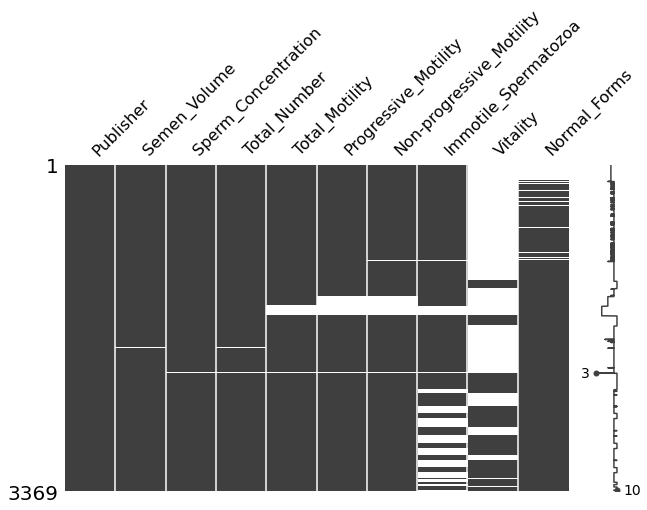

In [11]:
#missing value visualisaton
msno.matrix(df, figsize=(10,6))
plt.show()


👉 We can see that we have lots of missing value in our dataset.

In [12]:
# fill missing/null values with median
df_cols = ['Semen_Volume', 'Sperm_Concentration', 'Total_Number',
       'Total_Motility', 'Progressive_Motility', 'Non-progressive_Motility',
       'Immotile_Spermatozoa', 'Vitality', 'Normal_Forms'] 
for col in df_cols:
    df[col] = df[col].fillna(df[col].median())

In [13]:
df.isnull().sum()

Publisher                   0
Semen_Volume                0
Sperm_Concentration         0
Total_Number                0
Total_Motility              0
Progressive_Motility        0
Non-progressive_Motility    0
Immotile_Spermatozoa        0
Vitality                    0
Normal_Forms                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 0 to 3588
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher                 3369 non-null   object 
 1   Semen_Volume              3369 non-null   float64
 2   Sperm_Concentration       3369 non-null   float64
 3   Total_Number              3369 non-null   float64
 4   Total_Motility            3369 non-null   float64
 5   Progressive_Motility      3369 non-null   float64
 6   Non-progressive_Motility  3369 non-null   float64
 7   Immotile_Spermatozoa      3369 non-null   float64
 8   Vitality                  3369 non-null   float64
 9   Normal_Forms              3369 non-null   float64
dtypes: float64(9), object(1)
memory usage: 289.5+ KB




---



In [15]:

# create a function to show missing value info
def get_missing_values_info(df):

    # find missing values in each column
    count_missing = df.isnull().sum()

    # get missing values as percent
    percent_missing = (100 * count_missing / df.shape[0]).round(1)

    # Make dataframe with the results
    missing_df = pd.DataFrame({'Count Missing':count_missing,
                               'Percent Missing':percent_missing})

    # sort values by percent missing
    missing_df = missing_df.sort_values('Percent Missing', ascending=False)

    # find percent of columns with missing values and compare to total number of columns
    missing_values_list = df.columns[df.isnull().any()].tolist()
    cols_missing_vals = len(missing_values_list)
    df_cols = df.shape[1]

    print(f'Columns With Missing Values: {cols_missing_vals}')
    print(f'Total Columns: {df_cols}')
    print(f'Percent of Columns with Missing Values: {round(cols_missing_vals/df_cols*100,1)}%')

    return missing_df

get_missing_values_info(df).head(20)

Columns With Missing Values: 0
Total Columns: 10
Percent of Columns with Missing Values: 0.0%


Count Missing  Percent Missing
Publisher                             0              0.0
Semen_Volume                          0              0.0
Sperm_Concentration                   0              0.0
Total_Number                          0              0.0
Total_Motility                        0              0.0
Progressive_Motility                  0              0.0
Non-progressive_Motility              0              0.0
Immotile_Spermatozoa                  0              0.0
Vitality                              0              0.0
Normal_Forms                          0              0.0

In [16]:
#df.dropna(inplace = True)
#df.fillna(method='bfill', inplace=True) / 'ffill'
#fill with mean/mode/median



---



#**Statistical information📈 -**

In [17]:
df.describe(include = "all")

Publisher  Semen_Volume  Sperm_Concentration  Total_Number  \
count       3369   3369.000000          3369.000000   3369.000000   
unique        10           NaN                  NaN           NaN   
top         Tang           NaN                  NaN           NaN   
freq        1050           NaN                  NaN           NaN   
mean         NaN      3.433856            84.027694    274.940371   
std          NaN      1.552036            65.332812    235.512918   
min          NaN      0.100000             0.900000      2.520000   
25%          NaN      2.300000            37.000000    111.864000   
50%          NaN      3.100000            68.000000    214.000000   
75%          NaN      4.210000           112.000000    370.000000   
max          NaN     12.500000           532.000000   3115.200000   

        Total_Motility  Progressive_Motility  Non-progressive_Motility  \
count      3369.000000           3369.000000               3369.000000   
unique             NaN                   NaN                       NaN   
top                NaN                   NaN                       NaN   
freq               NaN                   NaN                       NaN   
mean         64.344121             53.511525                 11.080941   
std          13.911262             13.698873                  9.523806   
min           0.000000              0.000000                  0.000000   
25%          56.000000             45.000000                  4.398827   
50%          64.000000             54.328358                  8.000000   
75%          73.000000             62.000000                 15.000000   
max         100.000000             94.000000                 56.000000   

        Immotile_Spermatozoa     Vitality  Normal_Forms  
count            3369.000000  3369.000000   3369.000000  
unique                   NaN          NaN           NaN  
top                      NaN          NaN           NaN  
freq                     NaN          NaN           NaN  
mean               37.653801    77.866726     16.415554  
std                11.160348     7.761651     11.015263  
min                 2.000000    29.000000      0.000000  
25%                32.000000    78.000000      8.000000  
50%                37.000000    78.000000     14.000000  
75%                43.000000    78.000000     21.000000  
max               100.000000   100.000000     76.000000

In [18]:
df.describe(include = ['O']).T

count unique   top  freq
Publisher  3369     10  Tang  1050

In [19]:
df.nunique()

Publisher                     10
Semen_Volume                 372
Sperm_Concentration          668
Total_Number                1746
Total_Motility               494
Progressive_Motility         493
Non-progressive_Motility     382
Immotile_Spermatozoa         489
Vitality                      65
Normal_Forms                 120
dtype: int64

#**EDA & Visualization-**


In [20]:
df['Publisher'].unique()

array(['Aboutorabi', 'Auger', 'Baker', 'Evgeni', 'Haugen', 'Jensen',
       'Lotti', 'Swan', 'Zedan', 'Tang'], dtype=object)

In [21]:
df['Publisher'].value_counts()

Tang          1050
Auger          826
Swan           487
Baker          206
Jensen         199
Zedan          170
Aboutorabi     168
Lotti          105
Haugen          82
Evgeni          76
Name: Publisher, dtype: int64

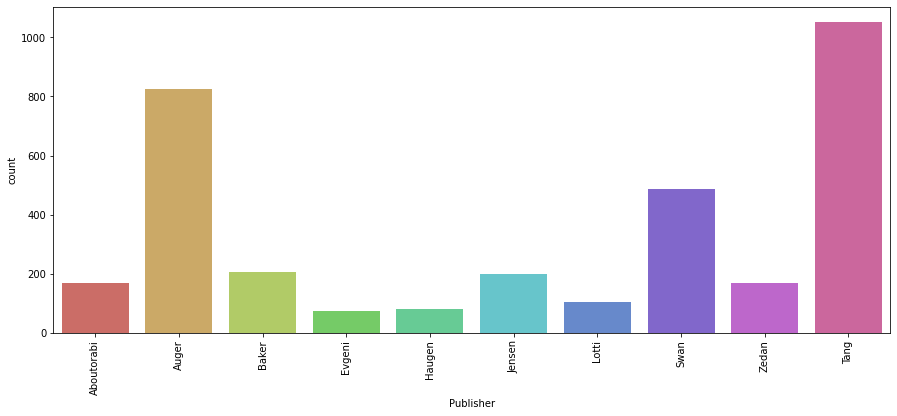

In [22]:
plt.figure(figsize=(15,6))
sns.countplot( x='Publisher', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

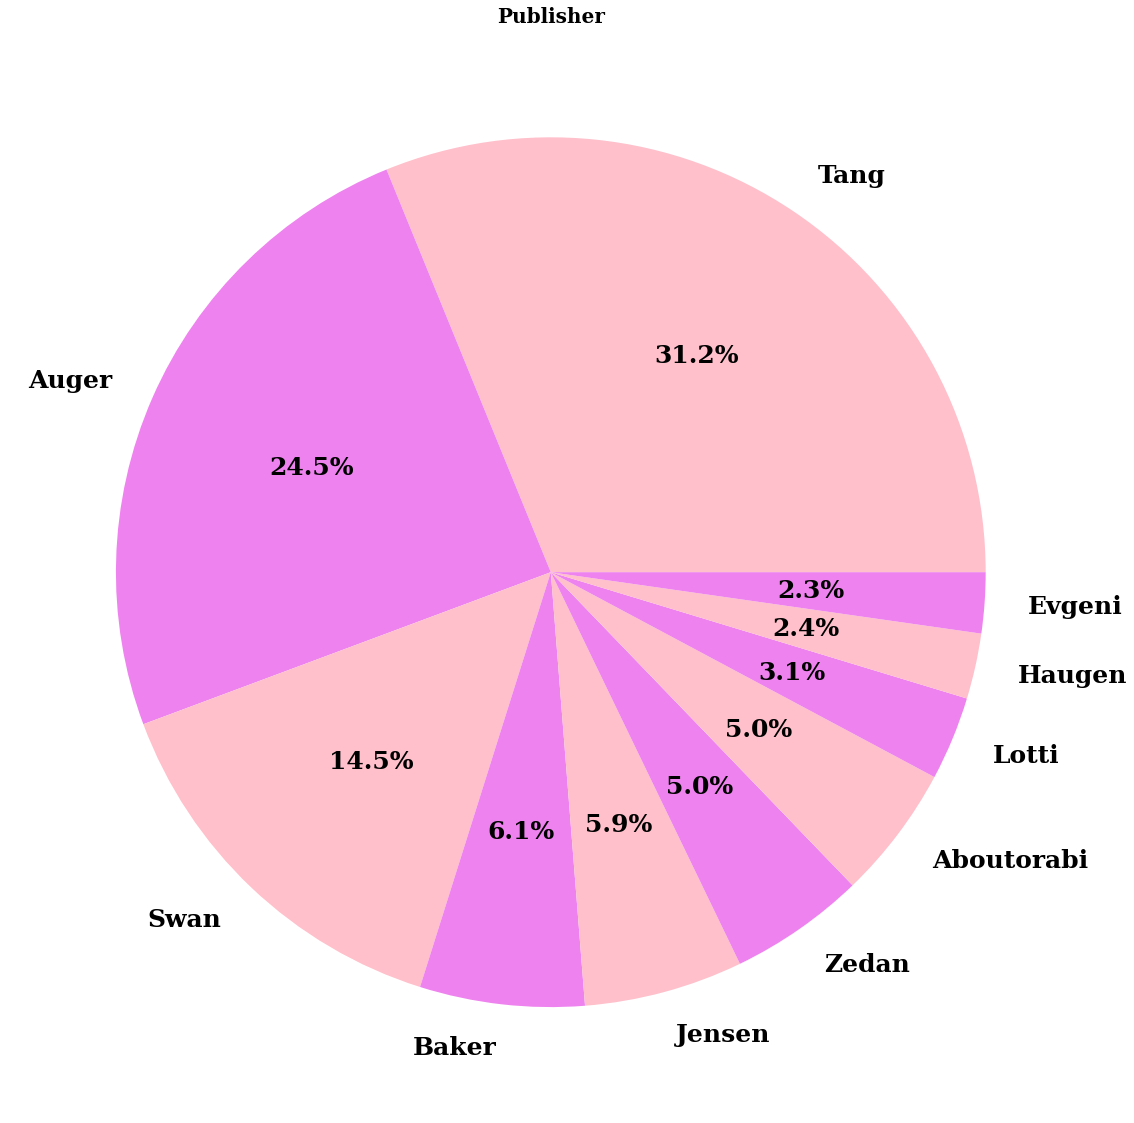

In [23]:
plt.figure(figsize=(30,20))
plt.pie(df['Publisher'].value_counts(),labels=df['Publisher'].value_counts().index,
        colors=['pink','violet'],autopct='%1.1f%%',textprops={'fontsize':25,
                                                              'color':'black',
                                                              'weight':'bold',
                                                              'family':'serif'})
hfont={'fontname':'serif','weight':'bold'}
plt.title('Publisher',size=20,**hfont)
plt.show()

In [24]:
df.columns

Index(['Publisher', 'Semen_Volume', 'Sperm_Concentration', 'Total_Number',
       'Total_Motility', 'Progressive_Motility', 'Non-progressive_Motility',
       'Immotile_Spermatozoa', 'Vitality', 'Normal_Forms'],
      dtype='object')

In [25]:
df_new = df[['Semen_Volume', 'Sperm_Concentration', 'Total_Number',
       'Total_Motility', 'Progressive_Motility', 'Non-progressive_Motility',
       'Immotile_Spermatozoa', 'Vitality', 'Normal_Forms']]

In [26]:
df_new

Semen_Volume  Sperm_Concentration  Total_Number  Total_Motility  \
0              3.2                 27.0          86.4            35.0   
1              0.8                136.0         108.8            47.0   
2              2.0                 71.0         142.0            49.0   
3              1.0                 35.0          35.0            50.0   
4              2.0                 46.0          92.0            51.0   
...            ...                  ...           ...             ...   
3579           2.0                115.0         230.0            79.0   
3581           4.0                 22.0          88.0            35.0   
3586           2.0                109.0         218.0            64.0   
3587           6.2                 96.0         595.2            39.0   
3588           3.0                 36.0         108.0            54.0   

      Progressive_Motility  Non-progressive_Motility  Immotile_Spermatozoa  \
0                     20.0                      15.0                  65.0   
1                     35.0                      12.0                  53.0   
2                     42.0                       7.0                  51.0   
3                     28.0                      22.0                  50.0   
4                     28.0                      33.0                  49.0   
...                    ...                       ...                   ...   
3579                  77.0                       2.0                  37.0   
3581                  32.0                       3.0                  37.0   
3586                  44.0                      20.0                  36.0   
3587                  29.0                      10.0                  61.0   
3588                  38.0                      16.0                  46.0   

      Vitality  Normal_Forms  
0         78.0          14.0  
1         78.0          14.0  
2         78.0          14.0  
3         78.0          14.0  
4         78.0          14.0  
...        ...           ...  
3579      82.0          25.0  
3581      38.0          23.0  
3586      78.0          11.0  
3587      78.0           7.0  
3588      78.0          11.0  

[3369 rows x 9 columns]

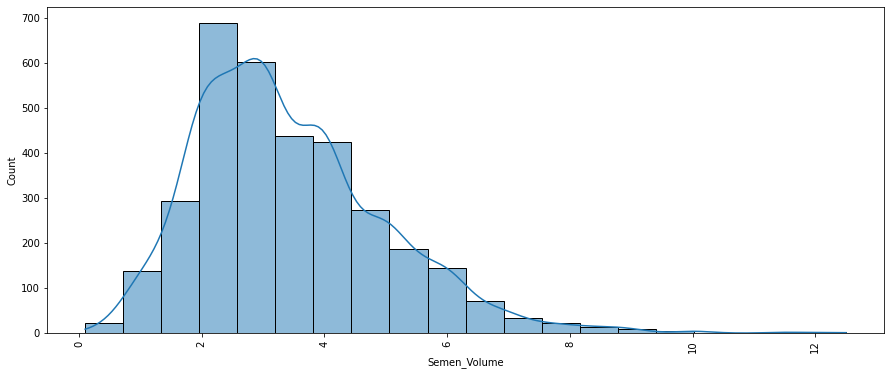

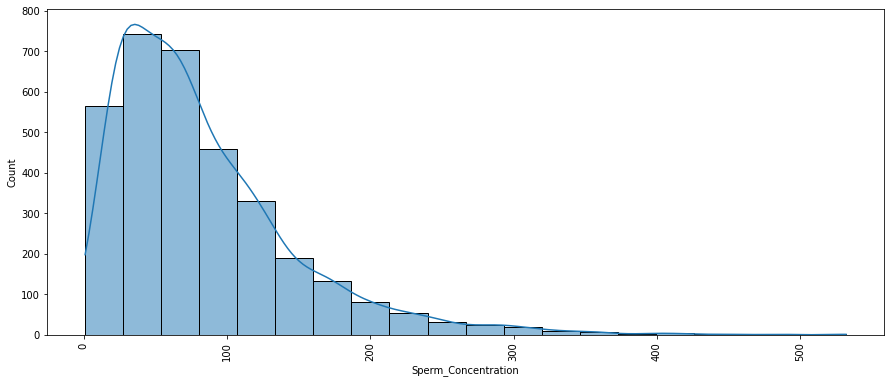

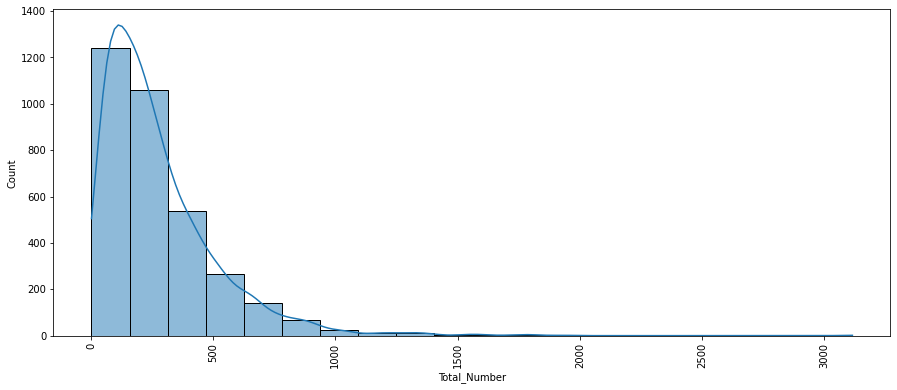

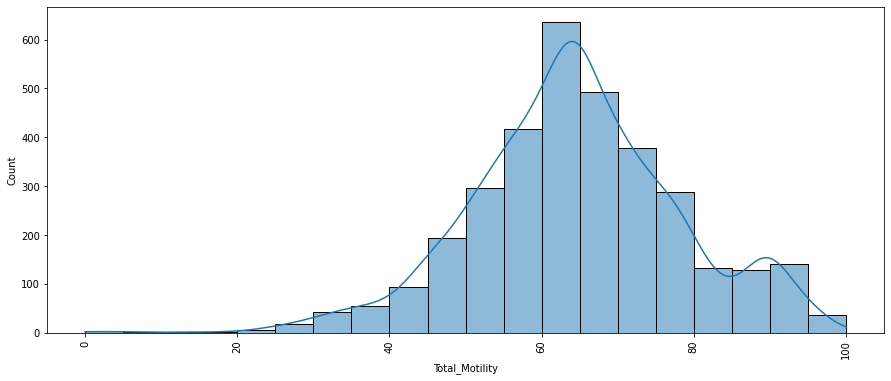

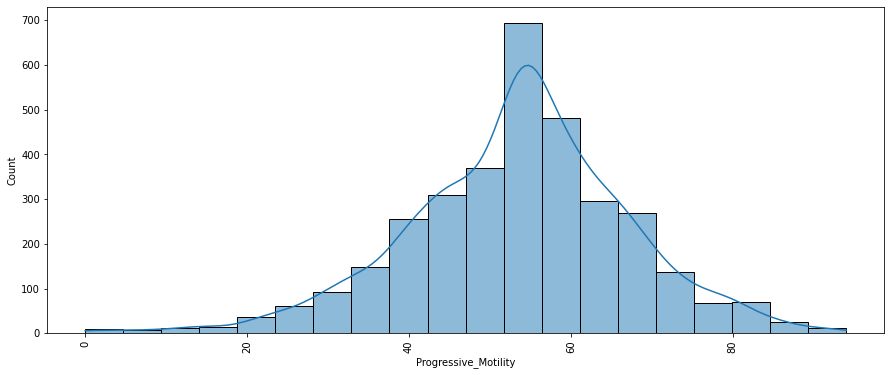

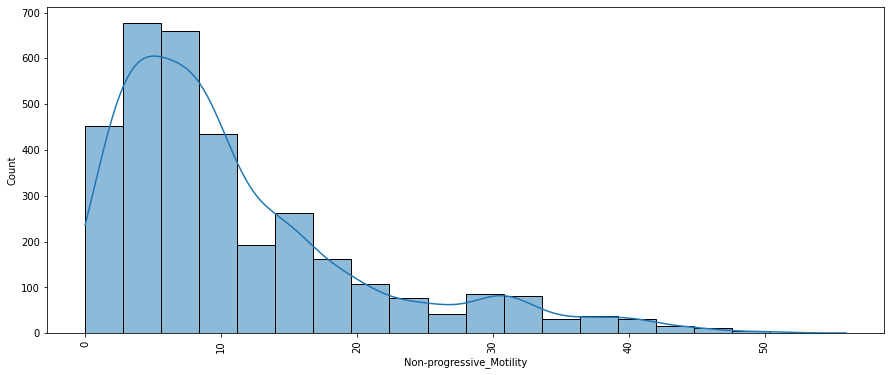

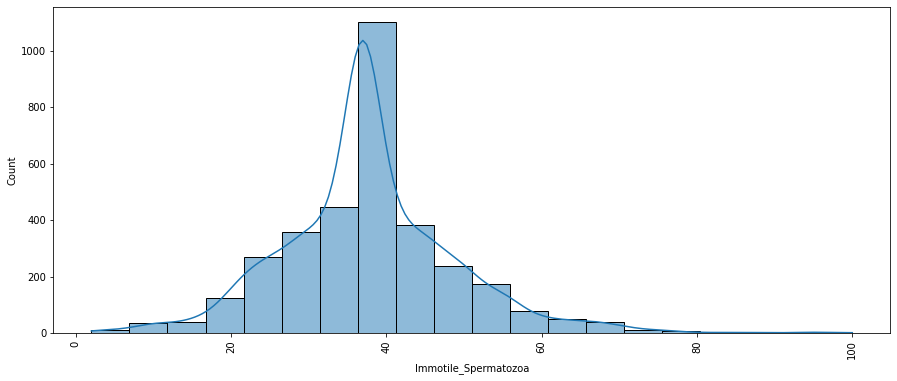

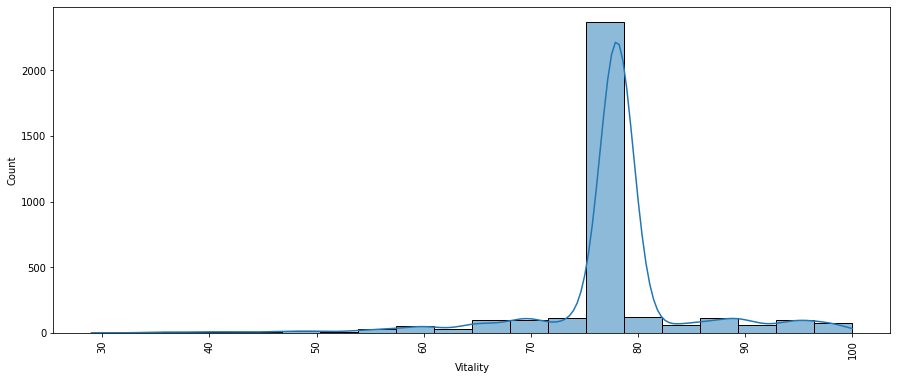

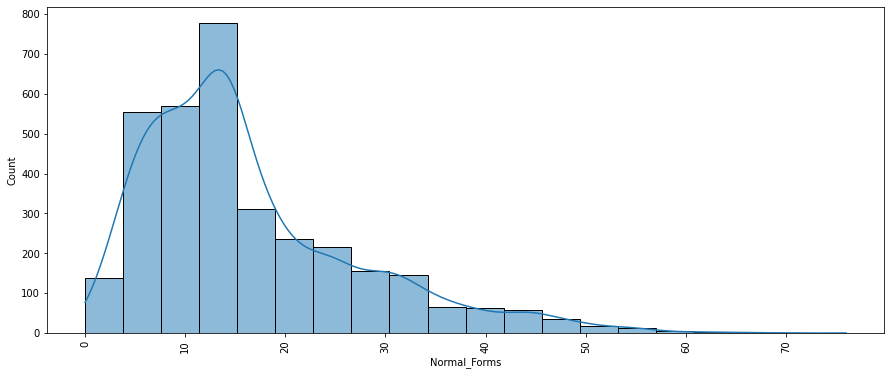

In [27]:
for i in df_new.columns:
  plt.figure(figsize=(15,6))
  sns.histplot(df_new[i], kde = True, bins = 20, palette="hls")
  plt.xticks(rotation = 90)
  plt.show()

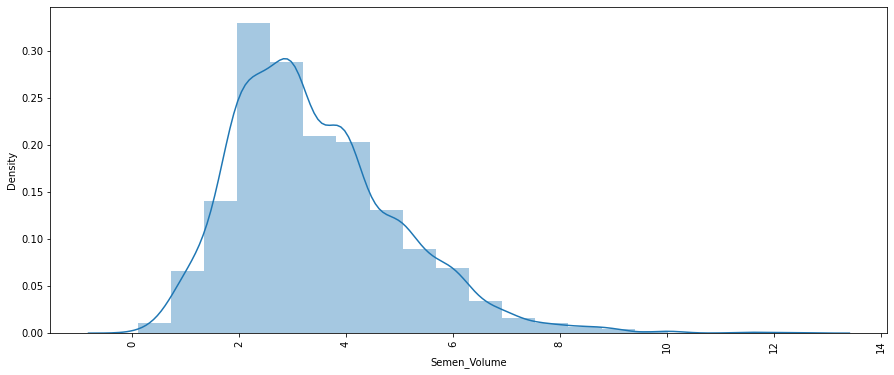

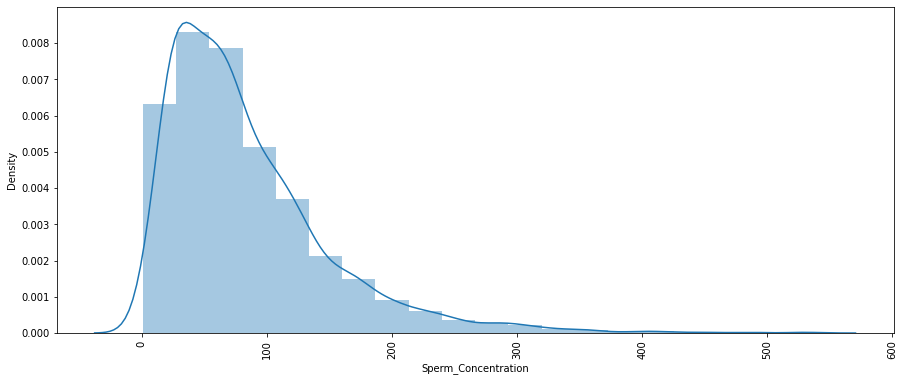

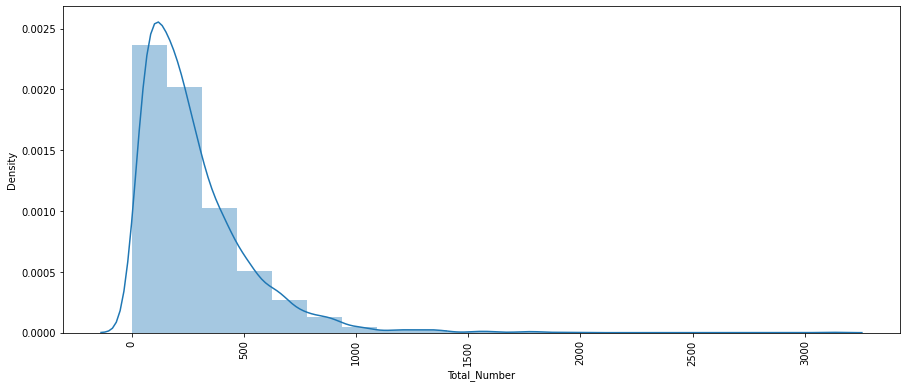

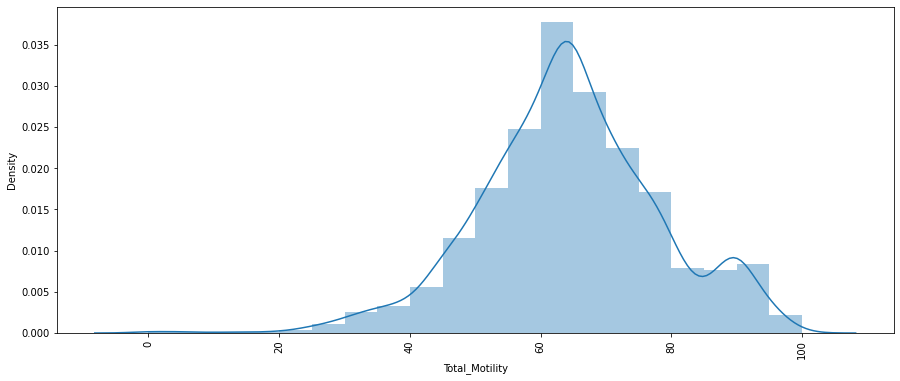

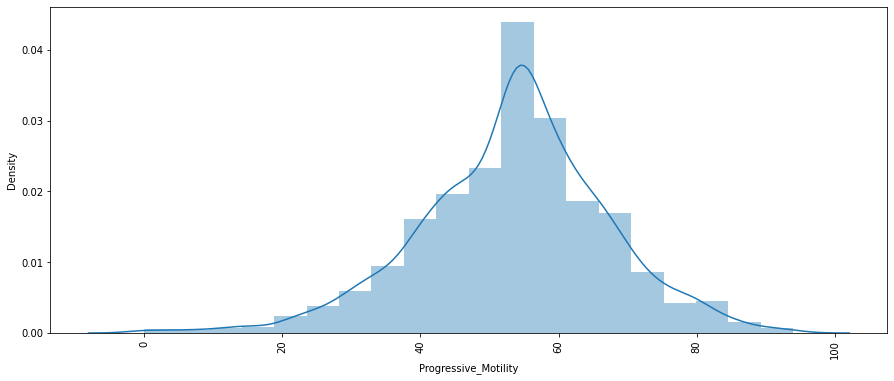

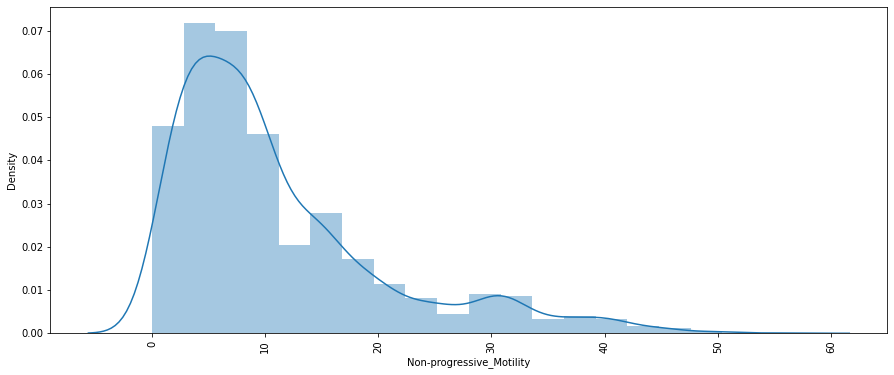

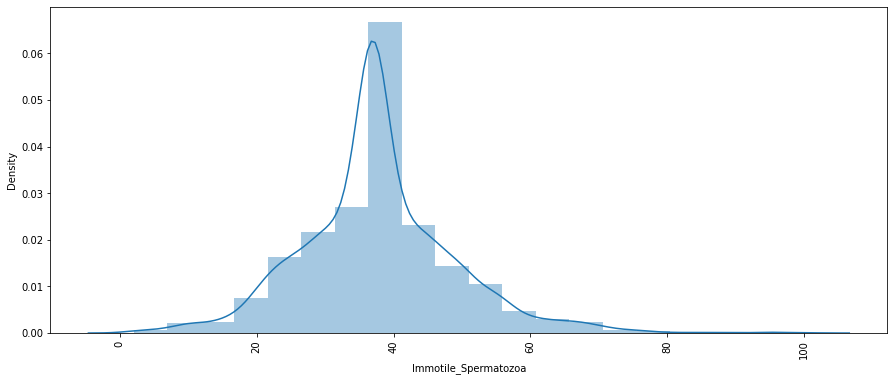

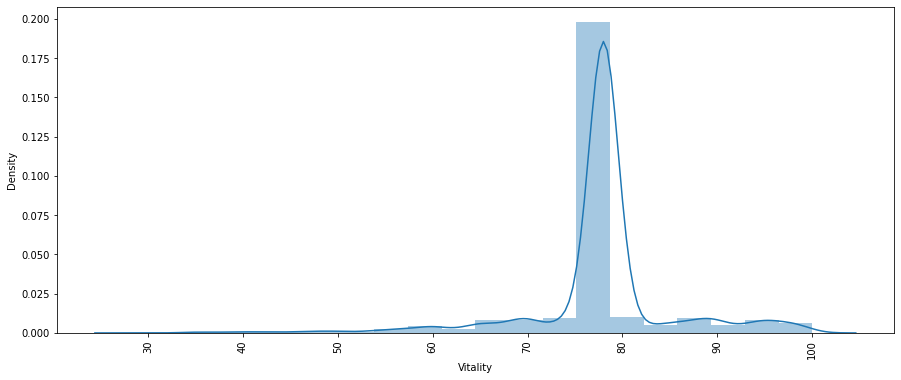

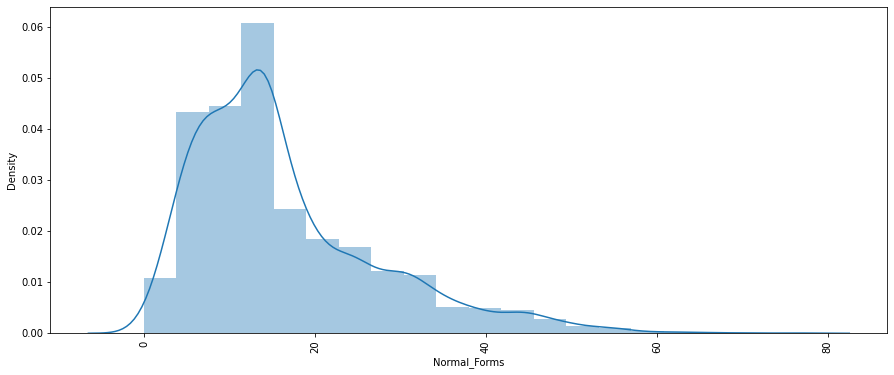

In [28]:
for i in df_new.columns:
  plt.figure(figsize=(15,6))
  sns.distplot(df_new[i], kde = True, bins = 20)
  plt.xticks(rotation = 90)
  plt.show()

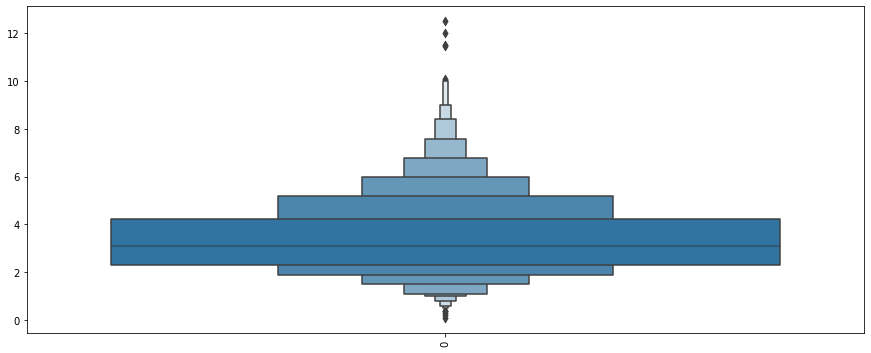

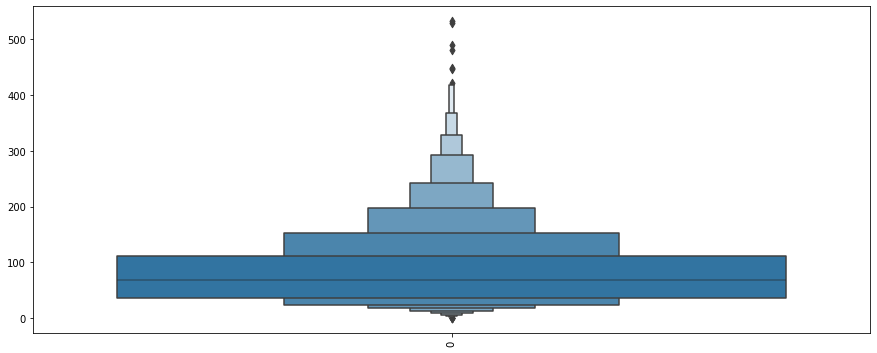

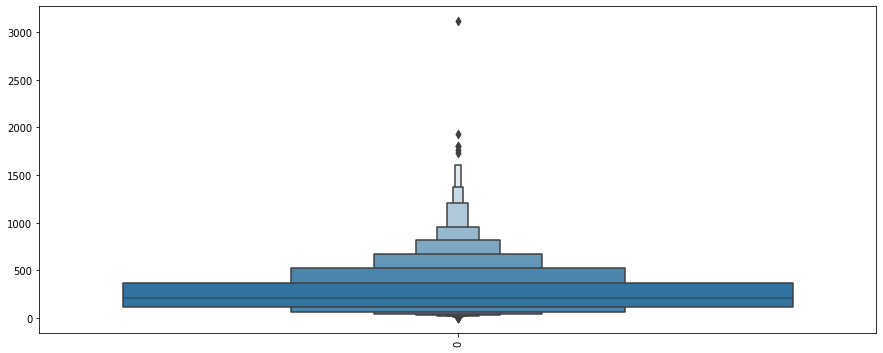

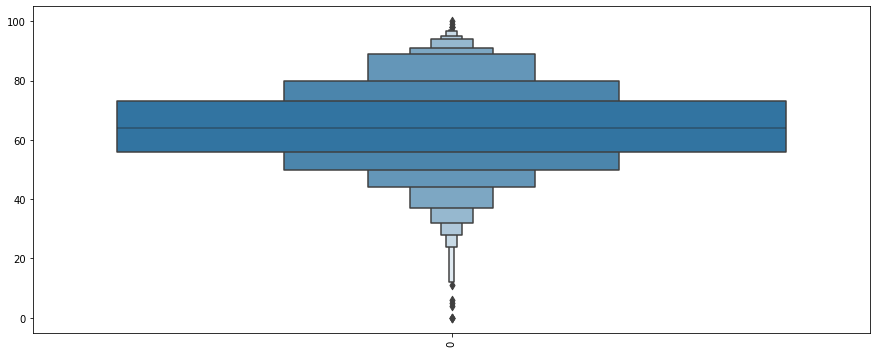

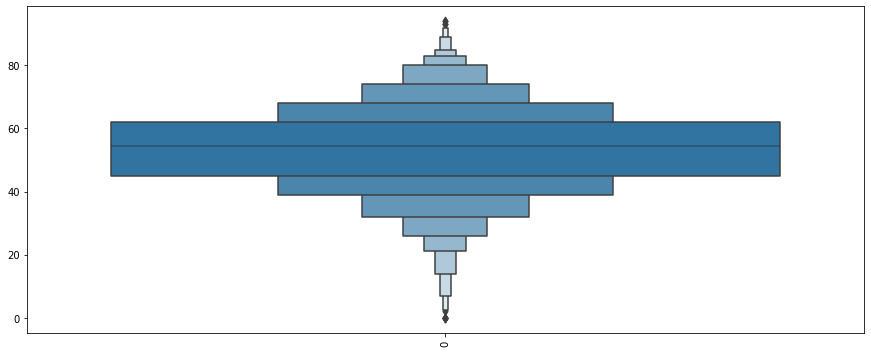

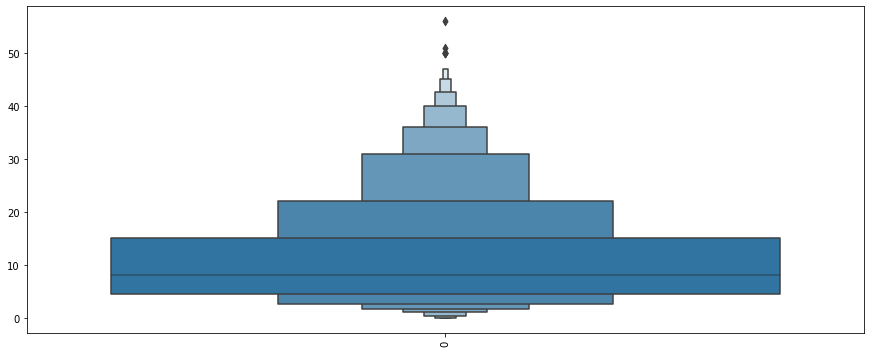

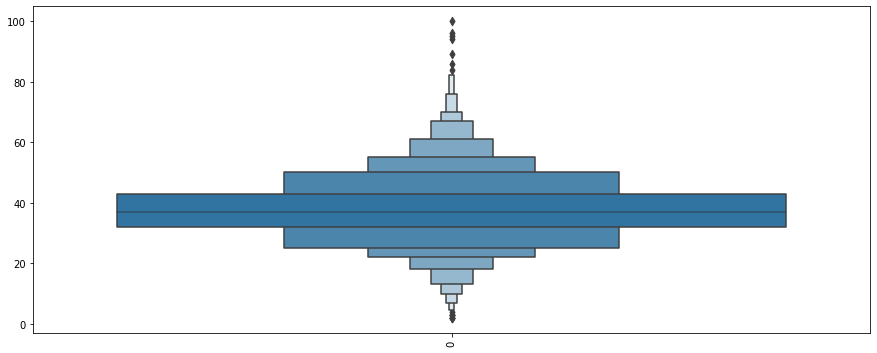

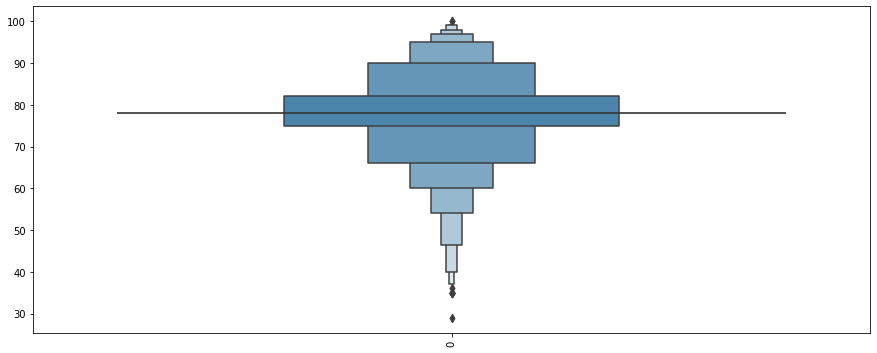

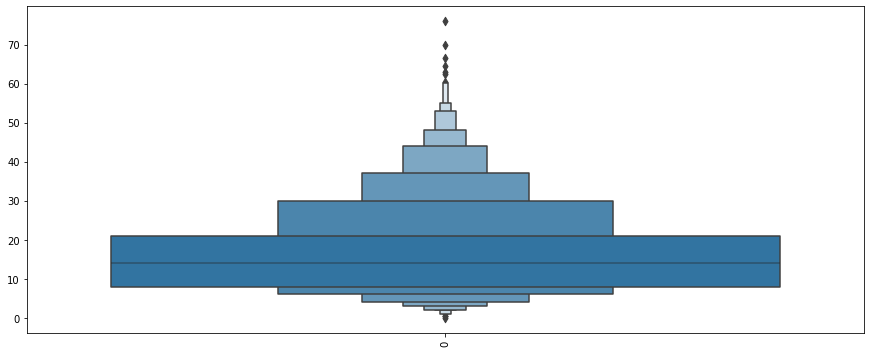

In [29]:
for i in df_new.columns:
  plt.figure(figsize=(15,6))
  sns.boxenplot(df_new[i])
  plt.xticks(rotation = 90)
  plt.show()

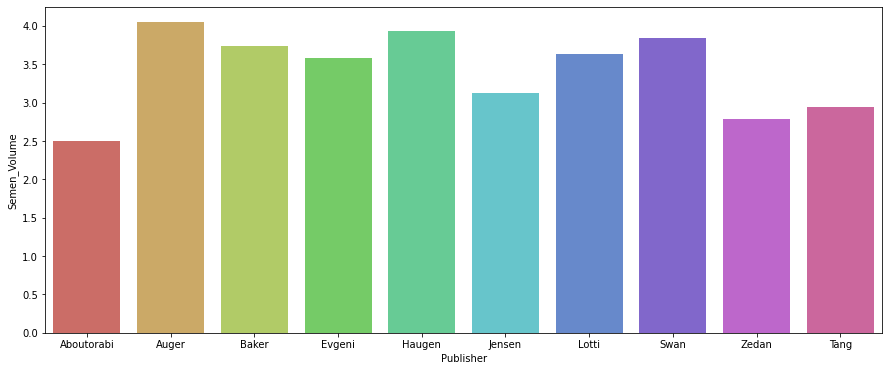

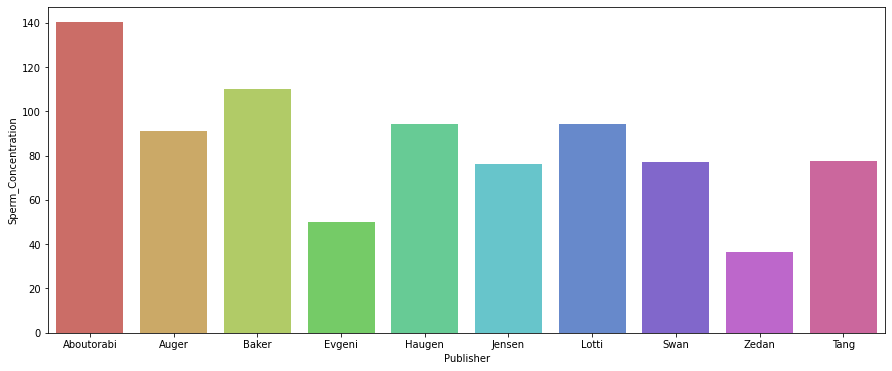

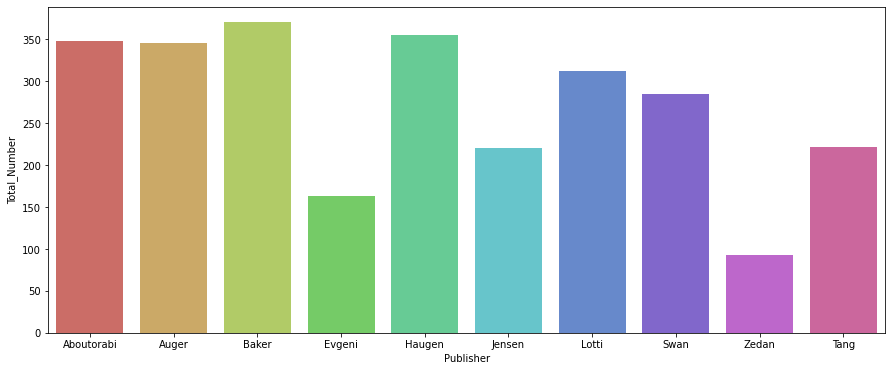

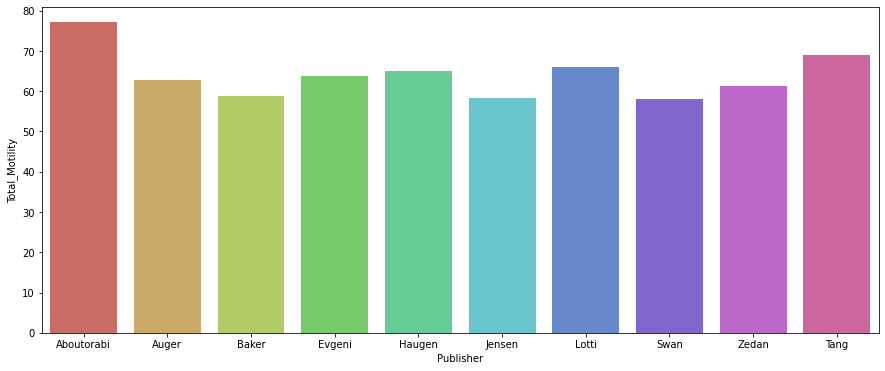

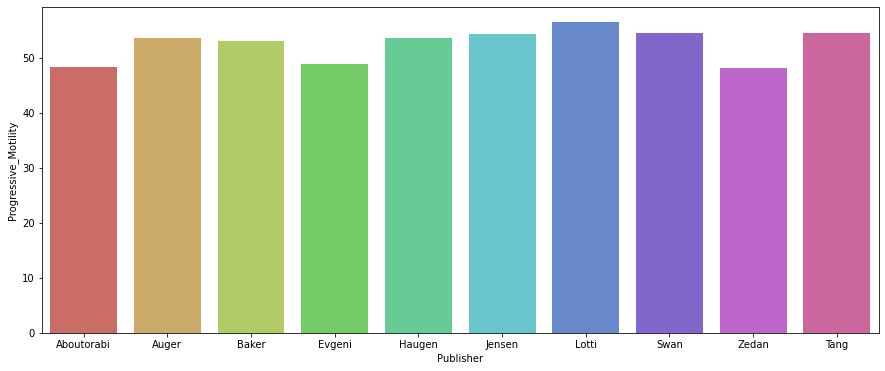

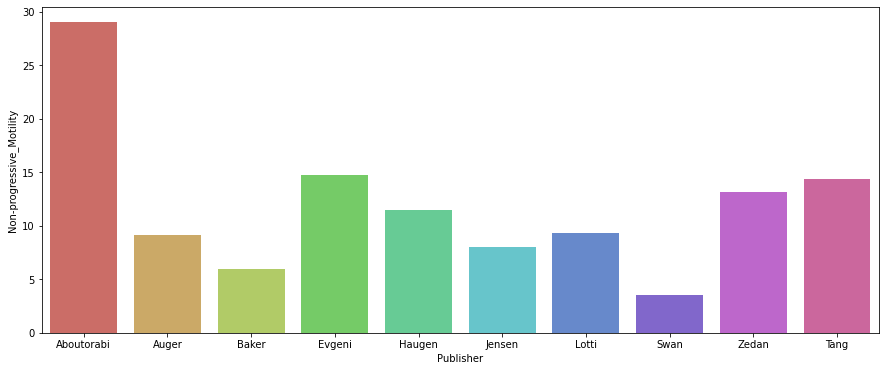

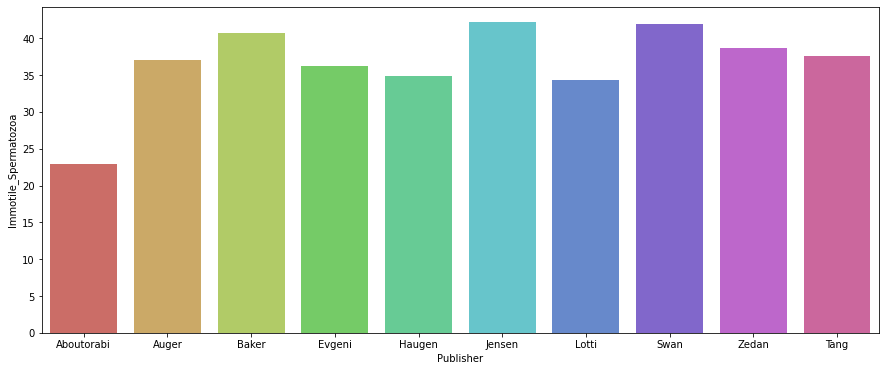

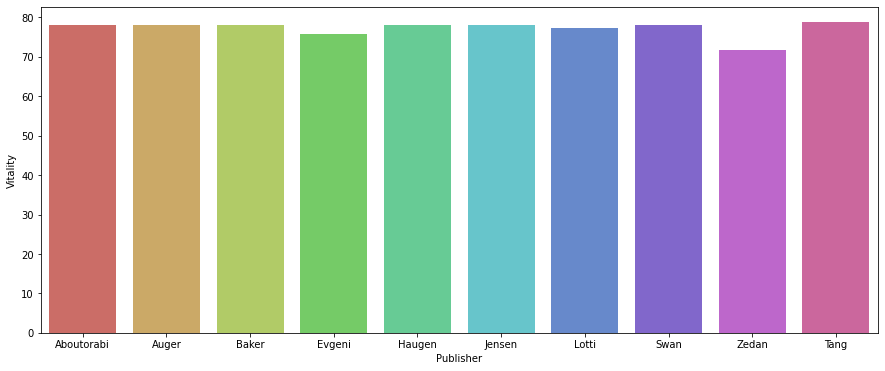

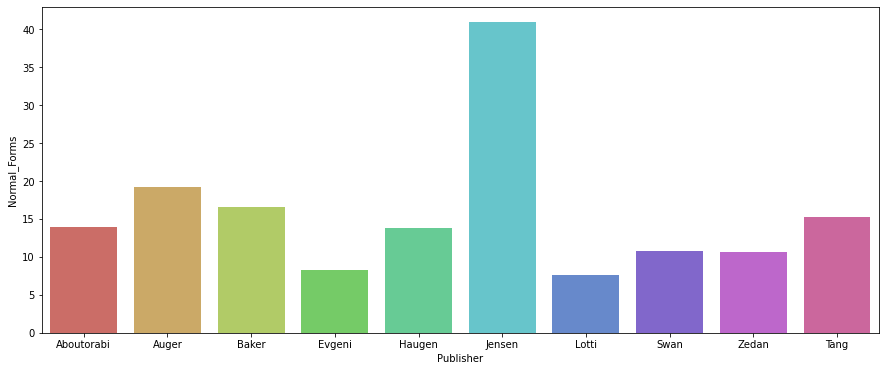

In [30]:
for i in df_new.columns:
  plt.figure(figsize=(15,6))
  sns.barplot(x = df['Publisher'], y= df_new[i], ci = None, palette = "hls" )
  plt.show()

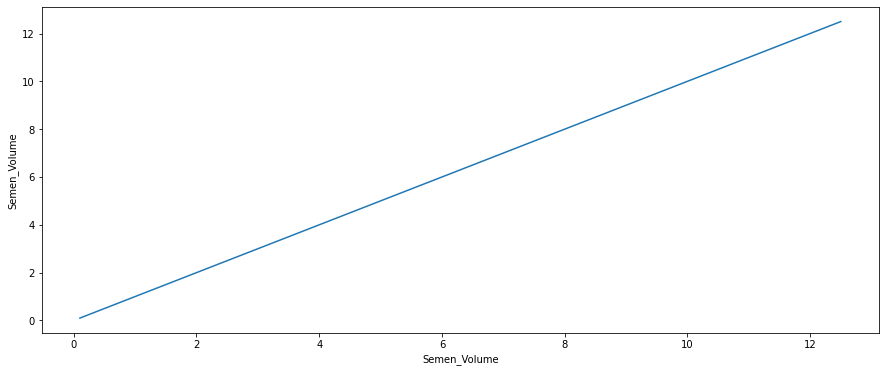

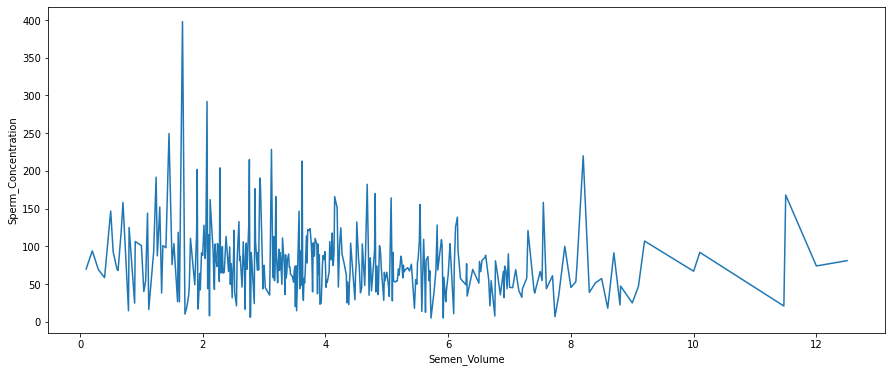

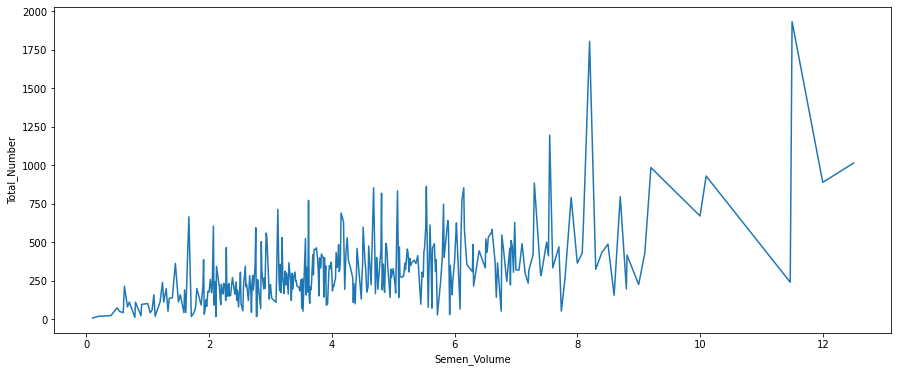

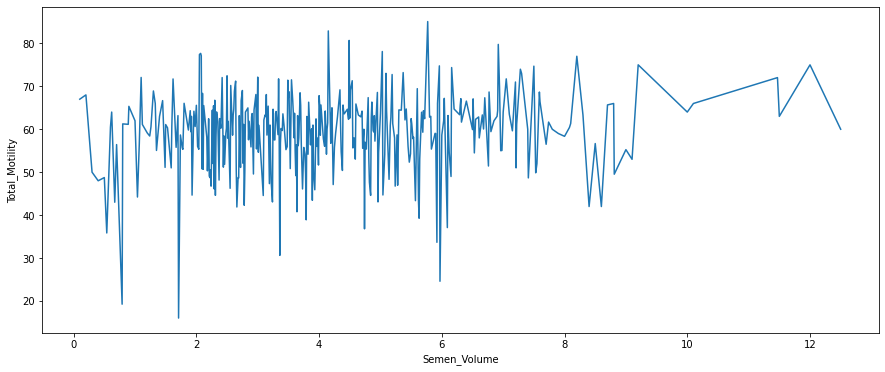

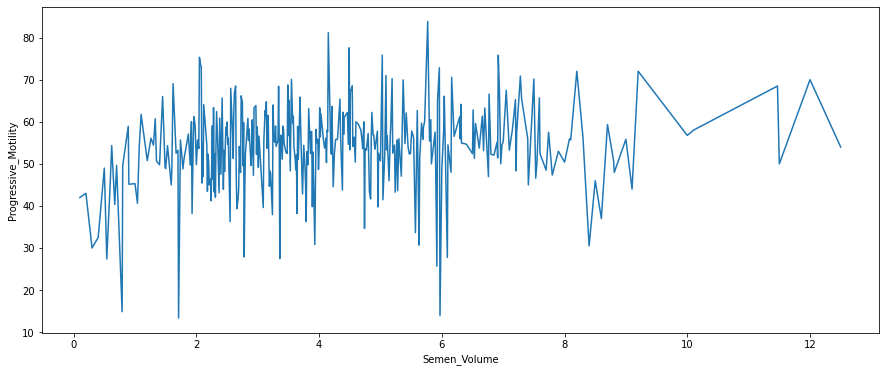

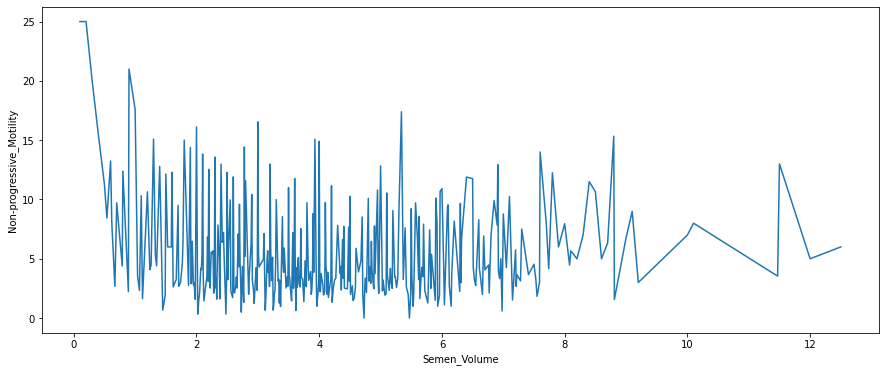

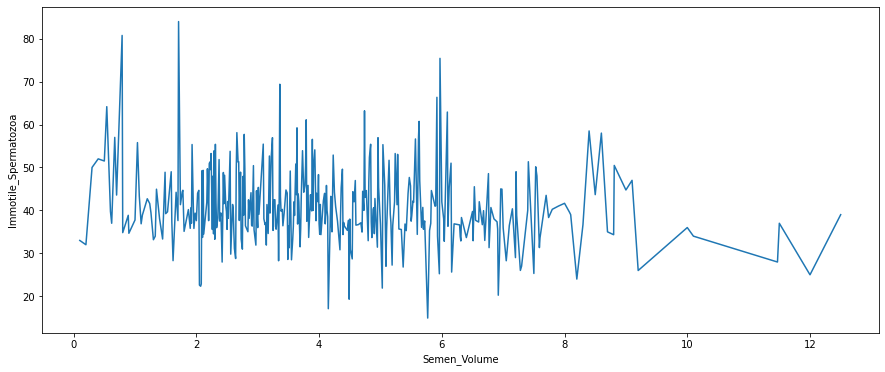

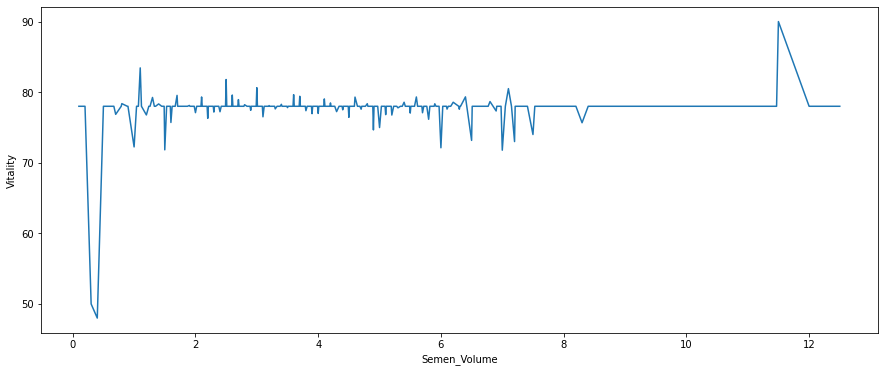

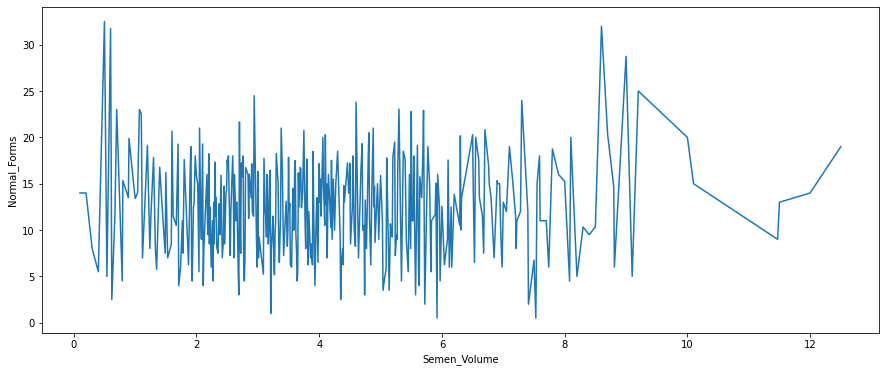

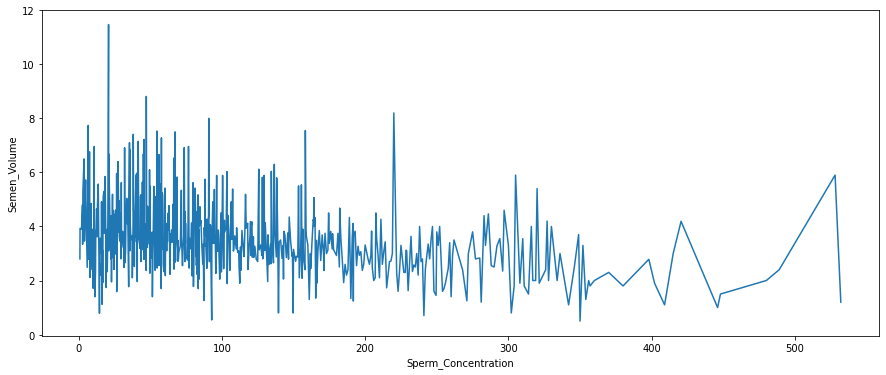

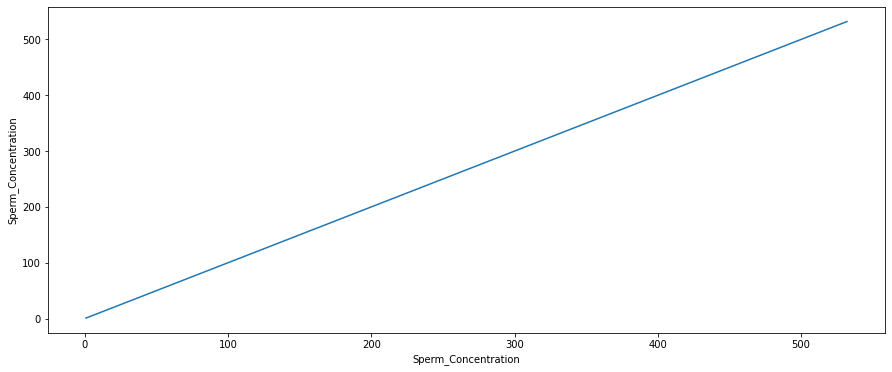

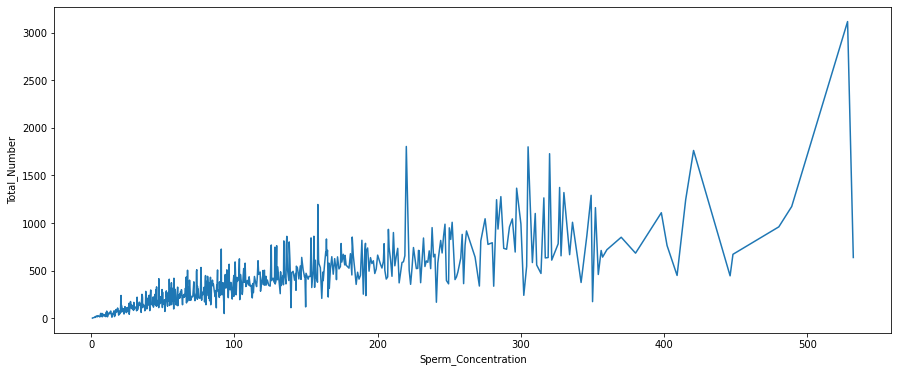

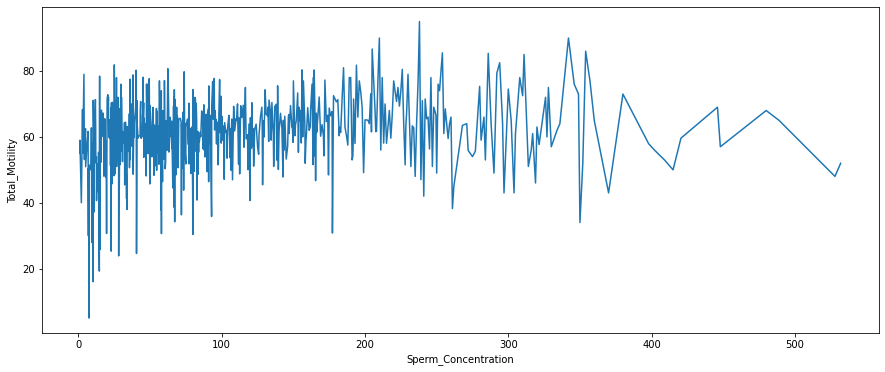

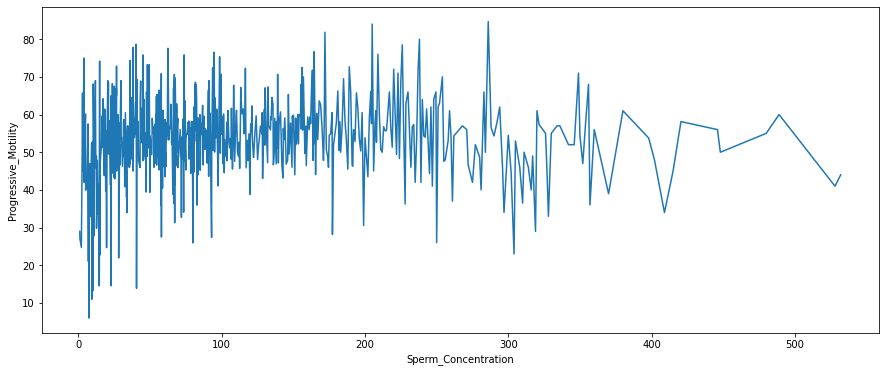

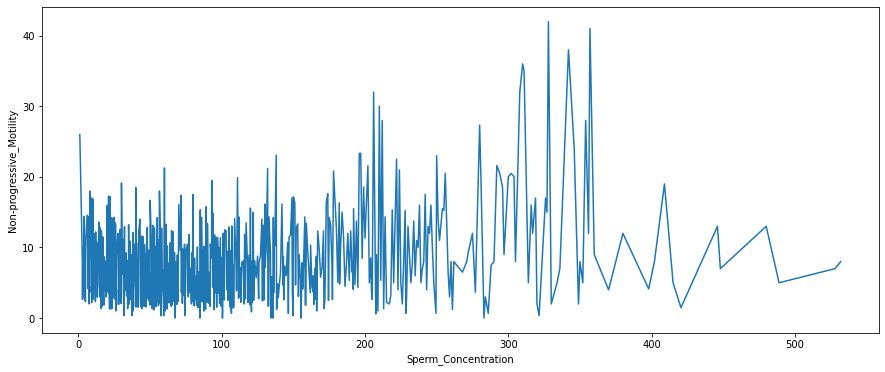

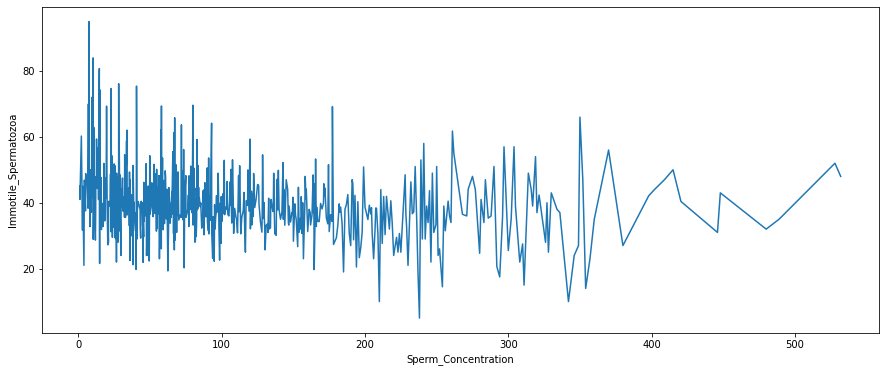

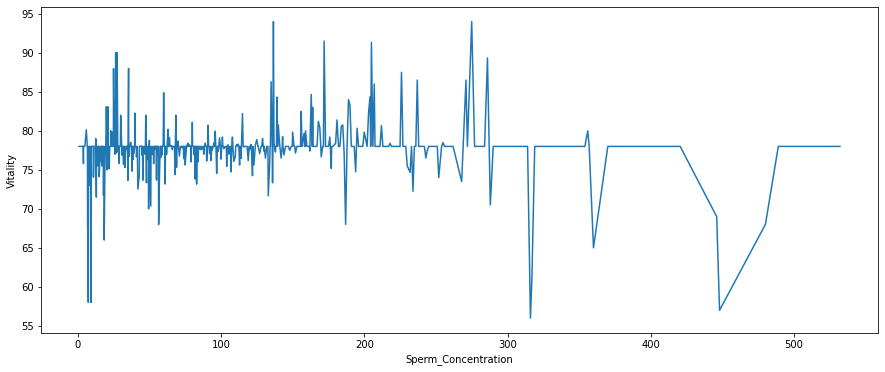

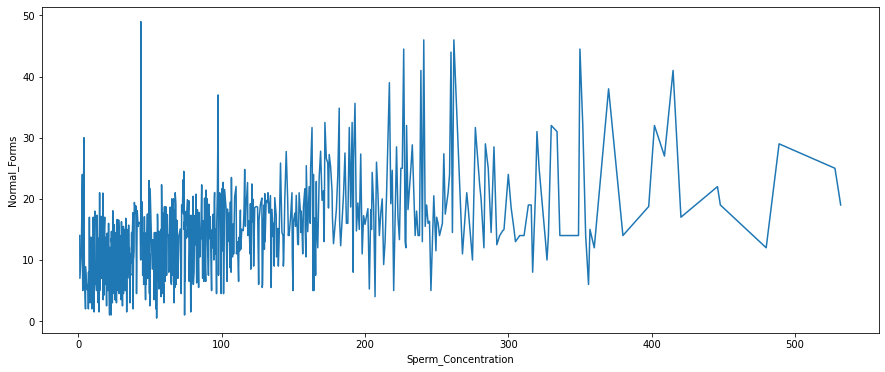

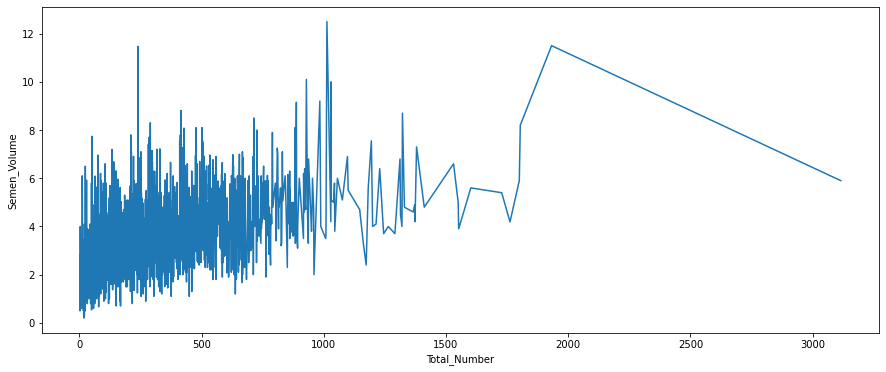

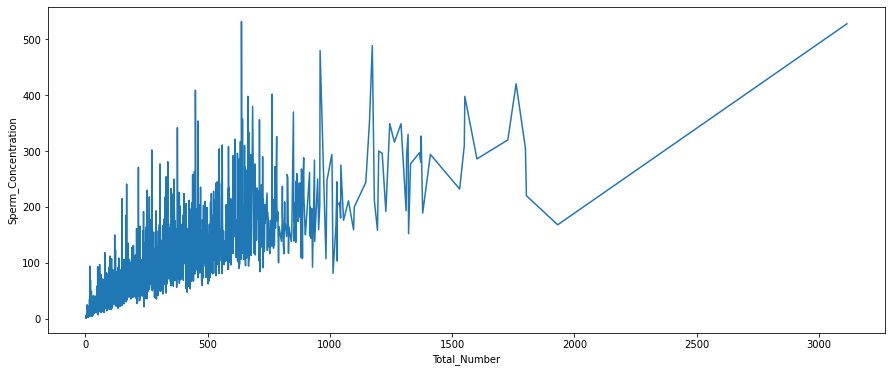

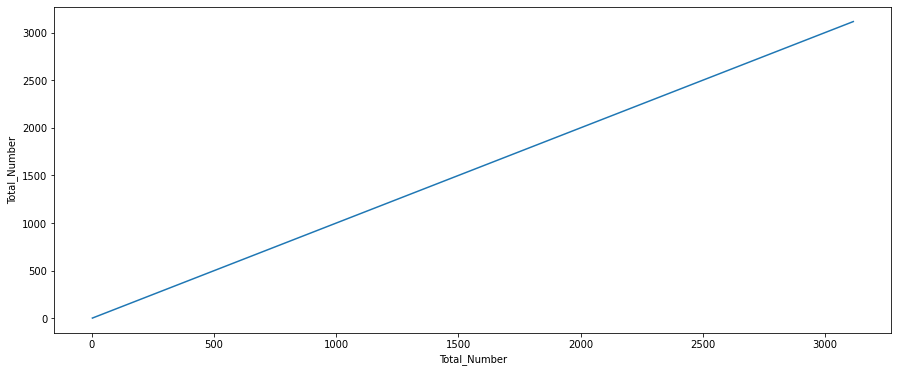

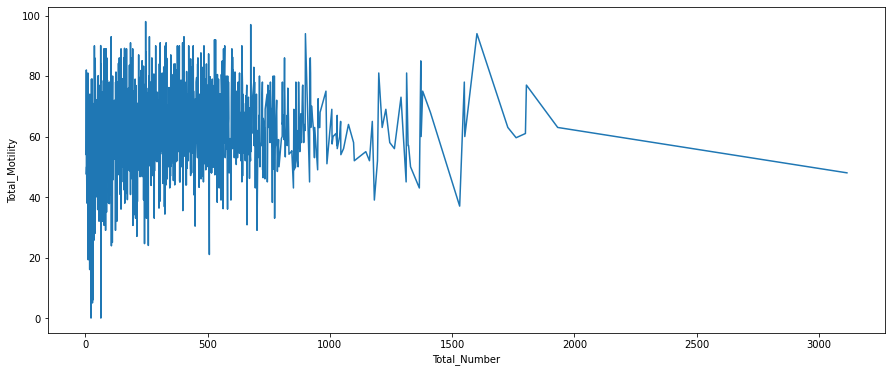

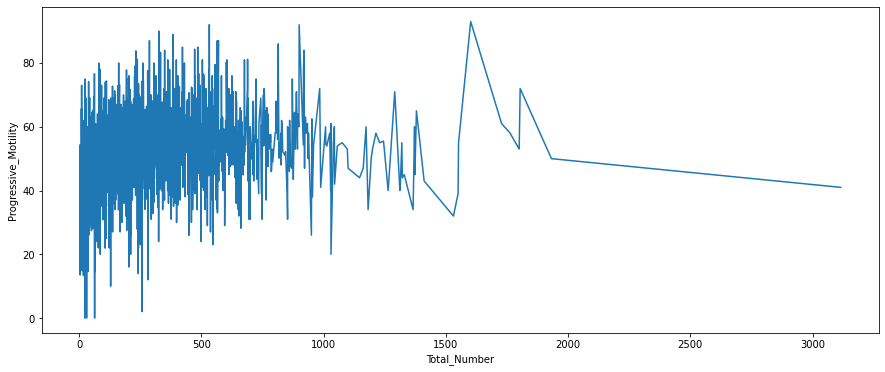

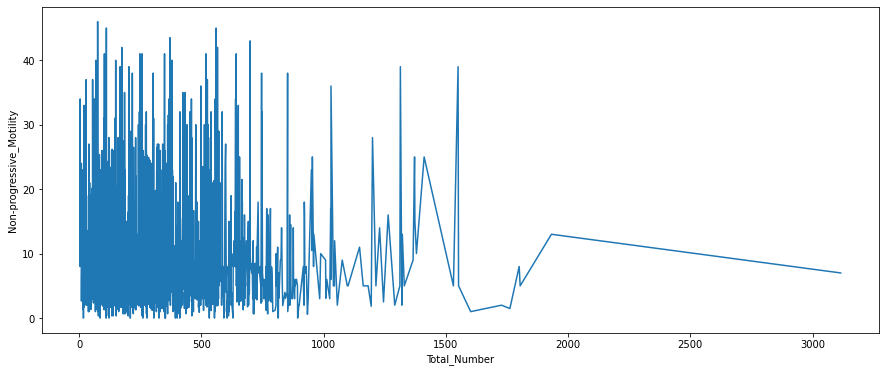

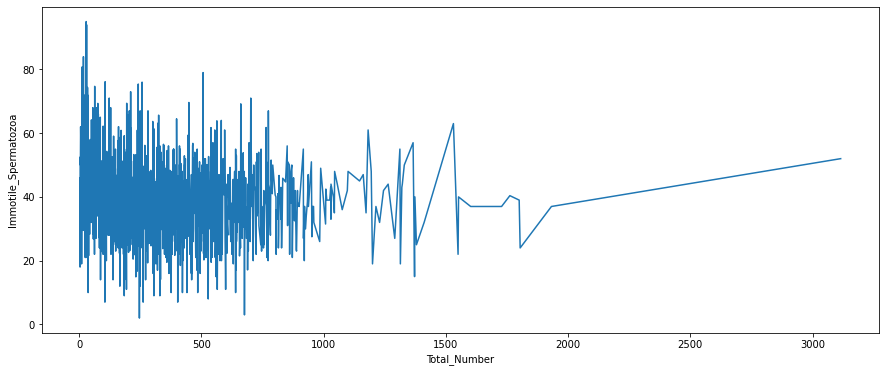

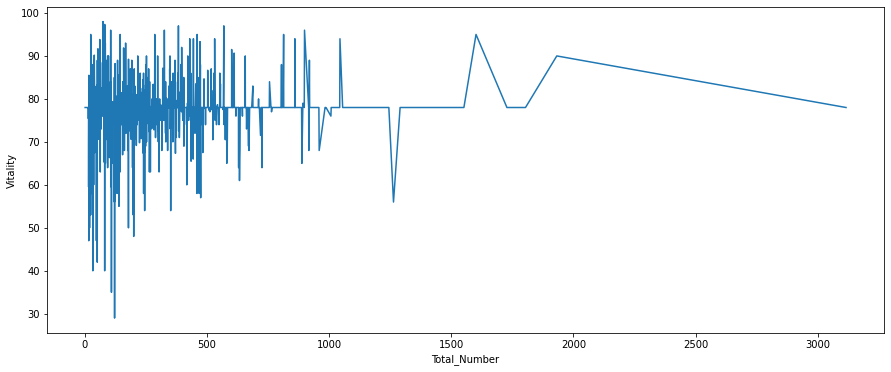

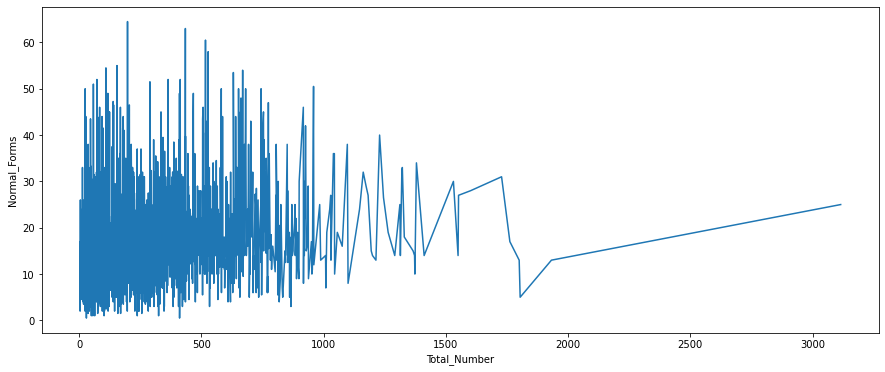

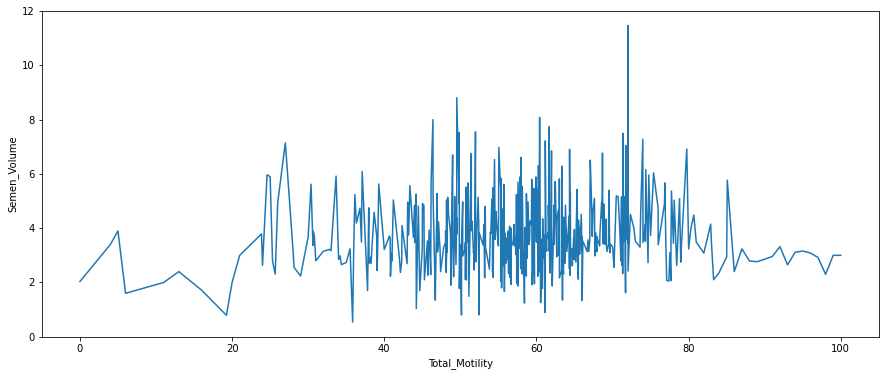

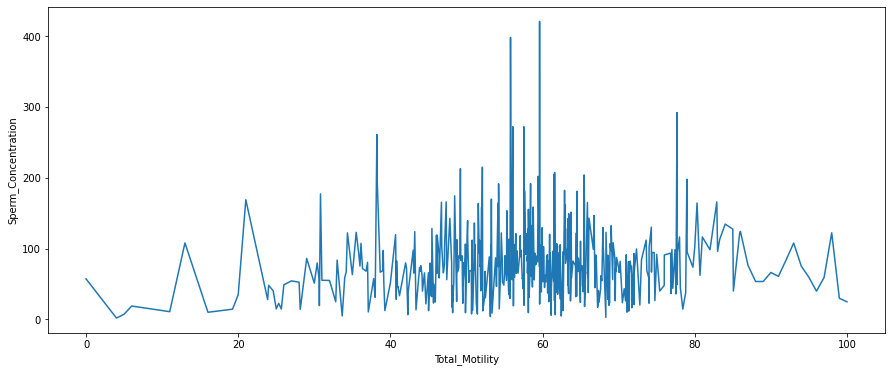

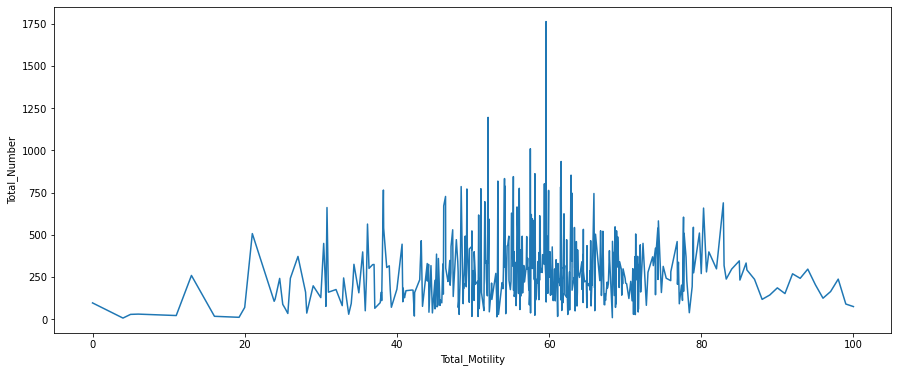

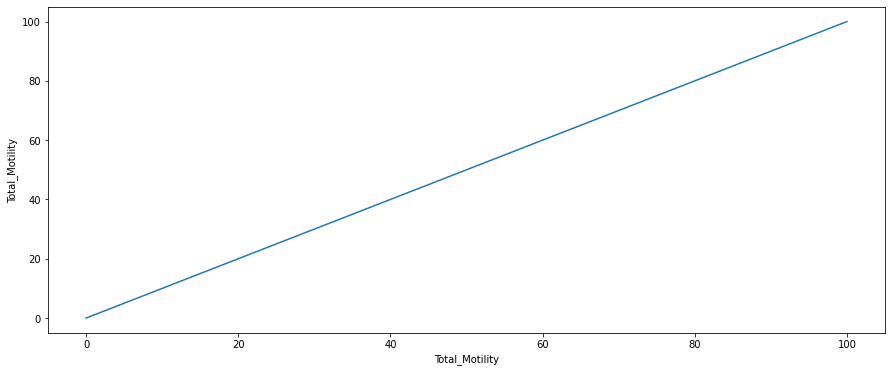

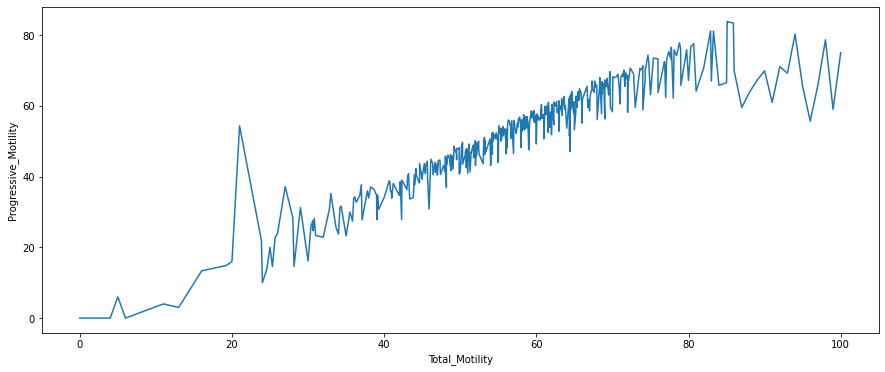

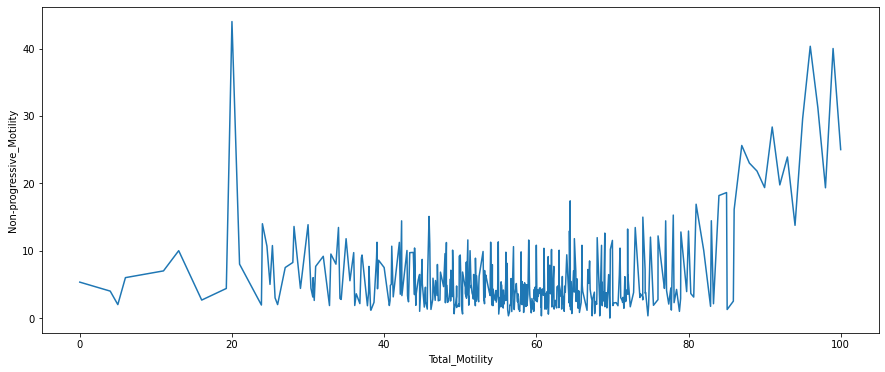

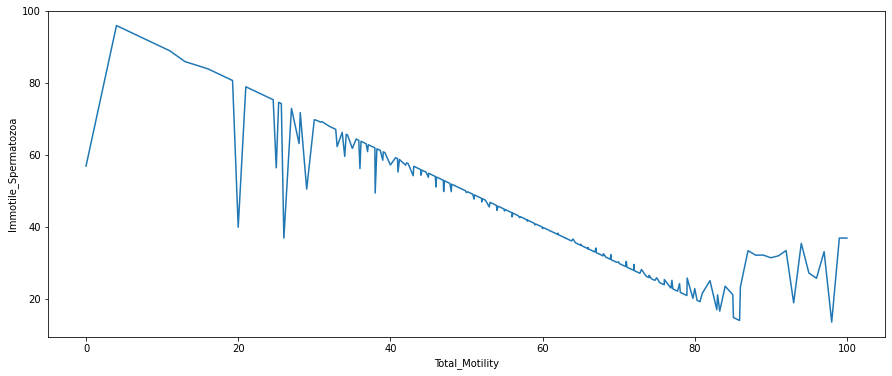

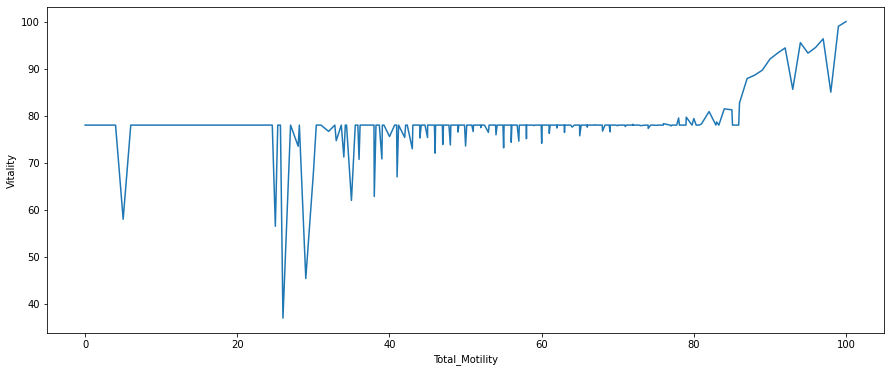

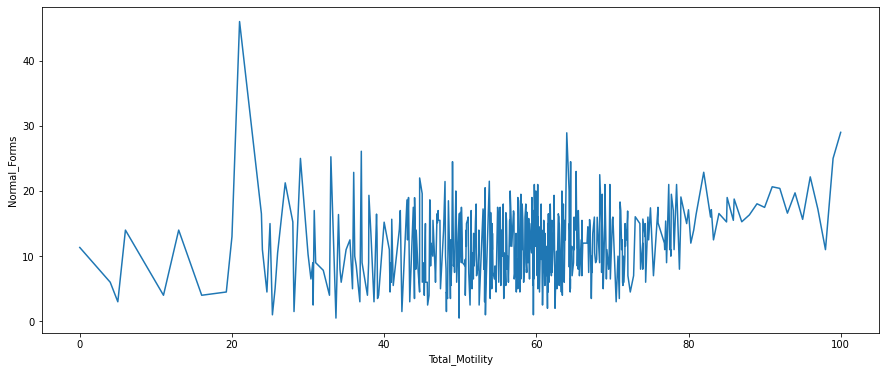

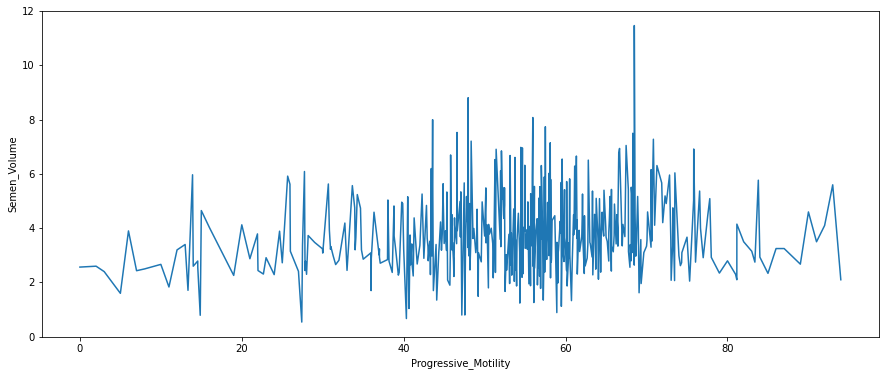

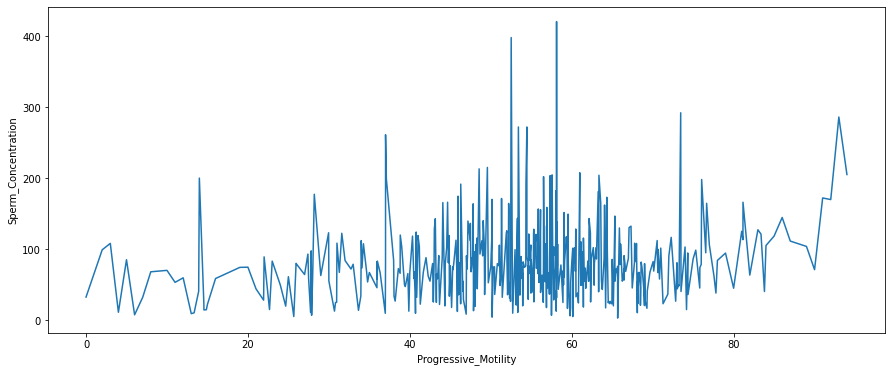

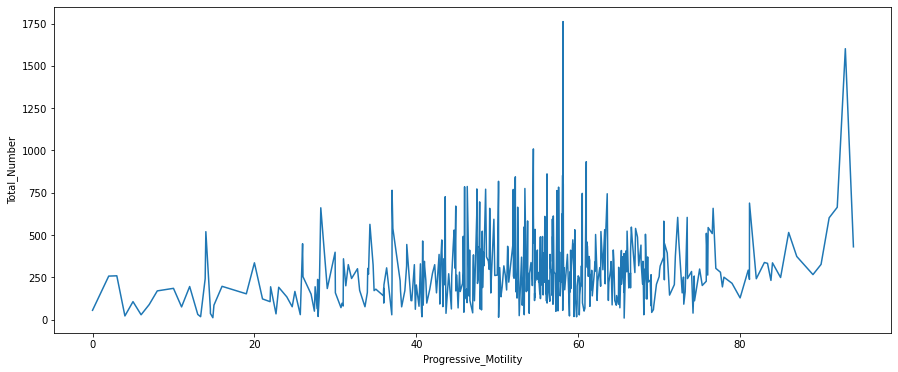

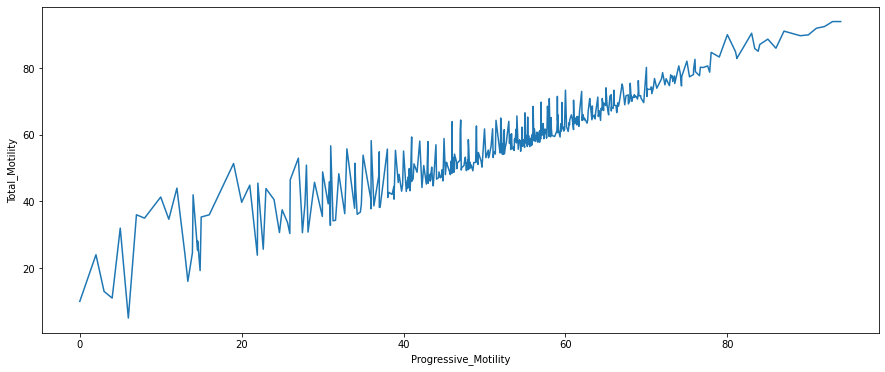

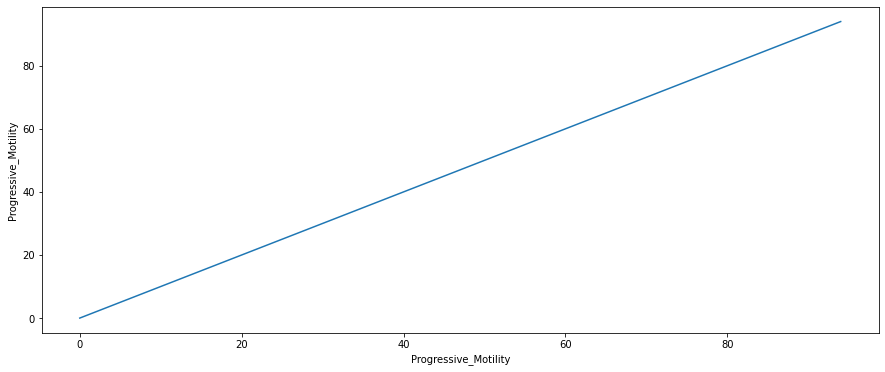

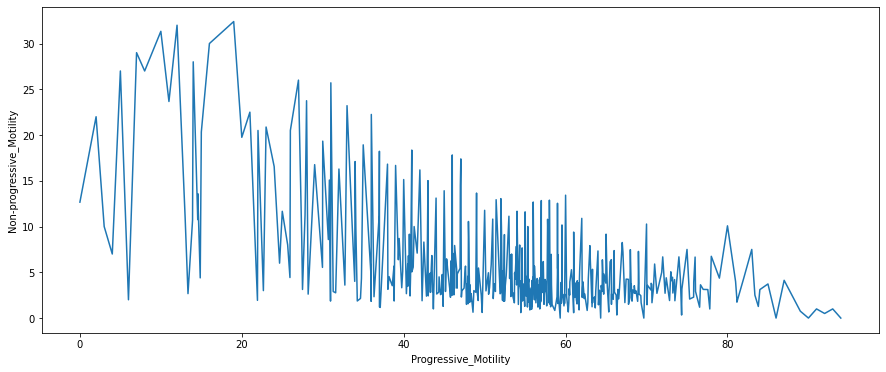

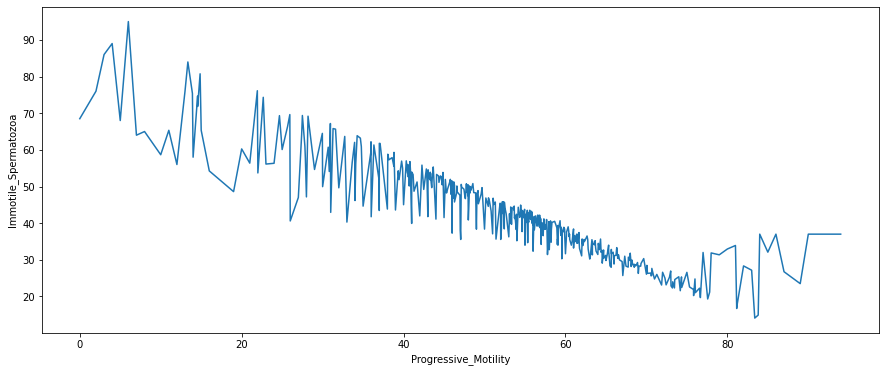

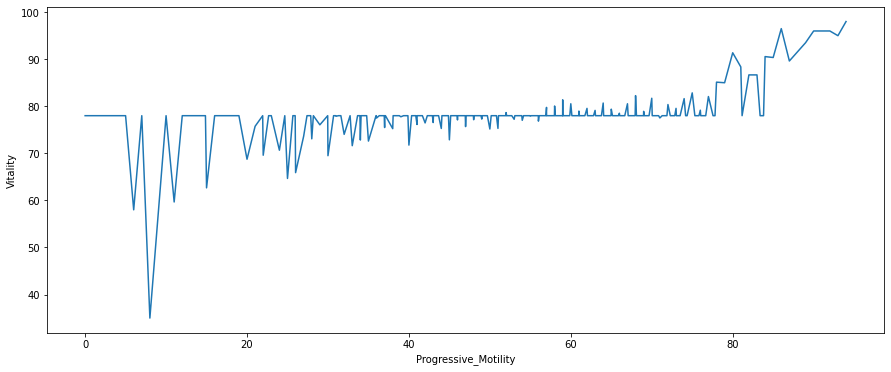

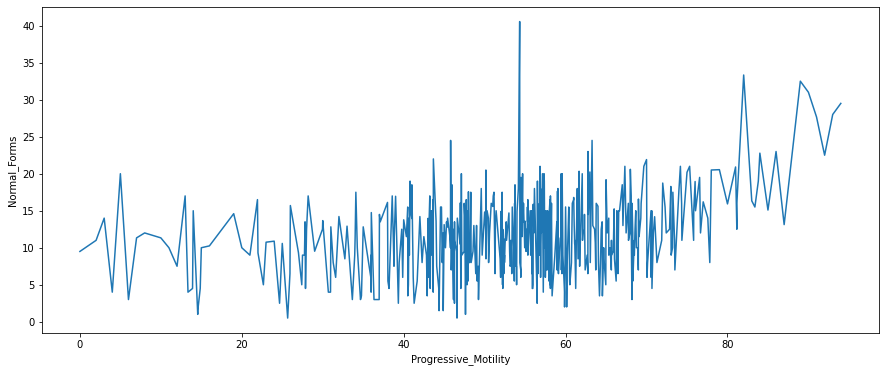

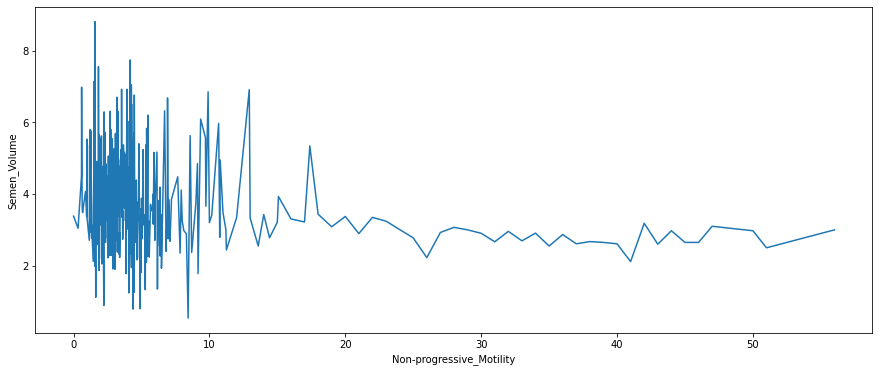

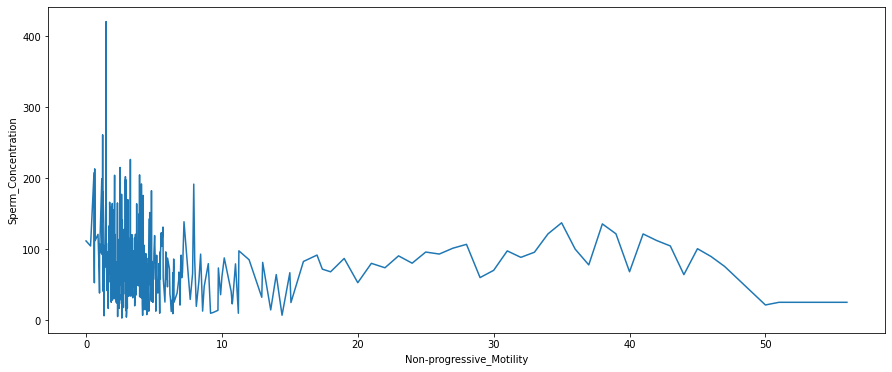

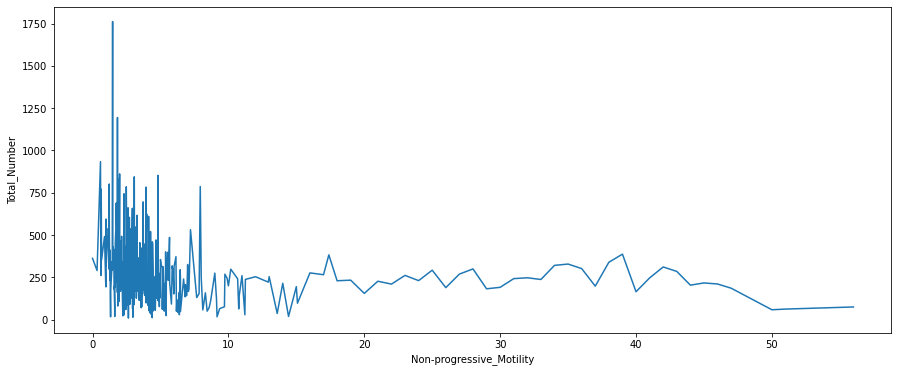

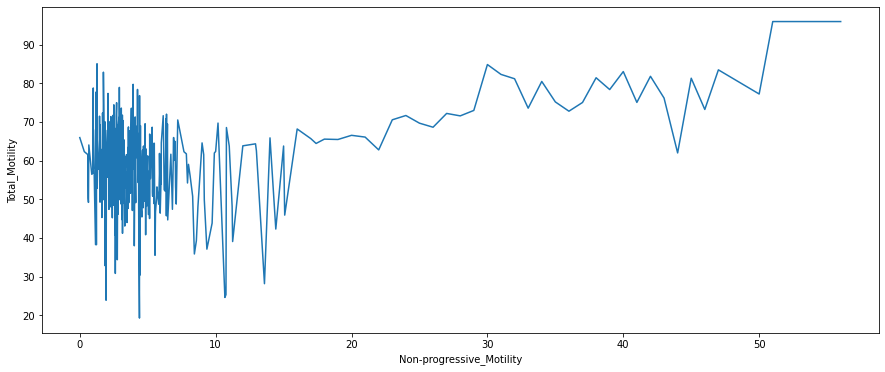

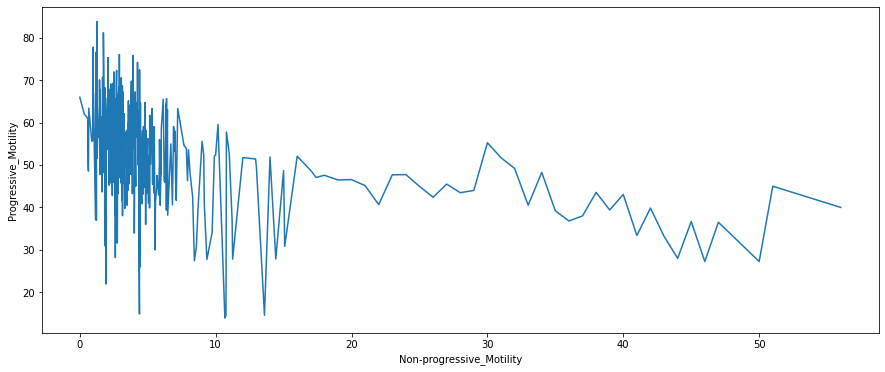

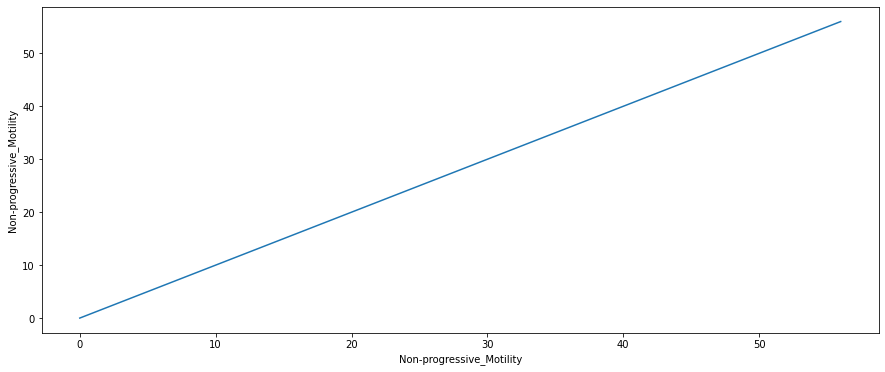

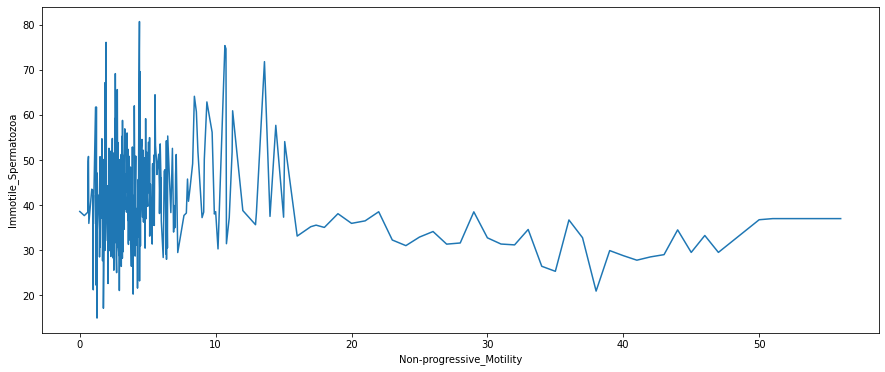

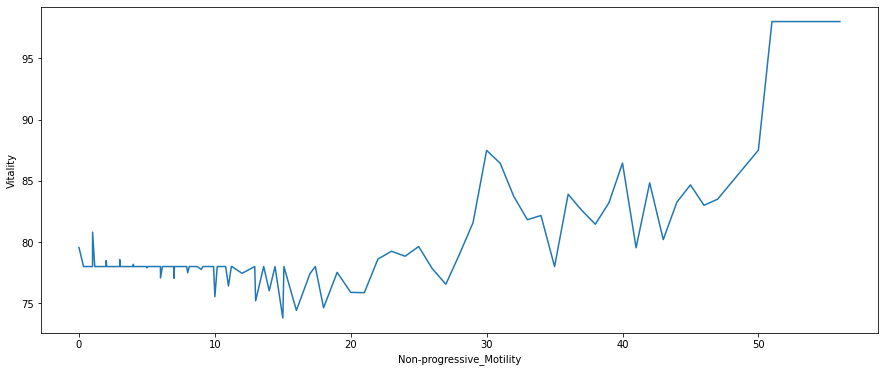

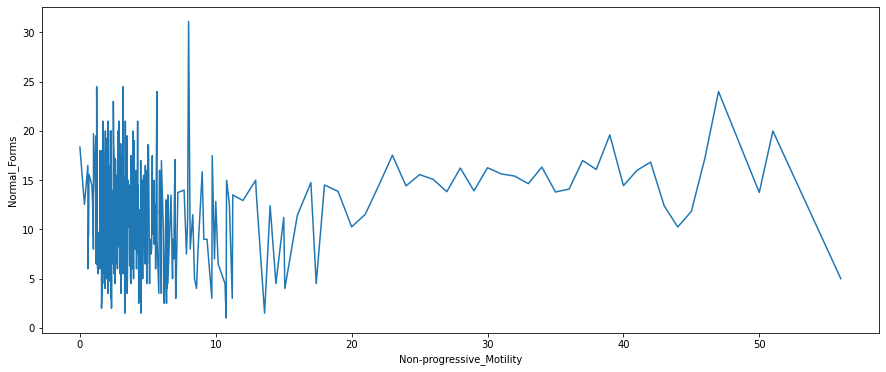

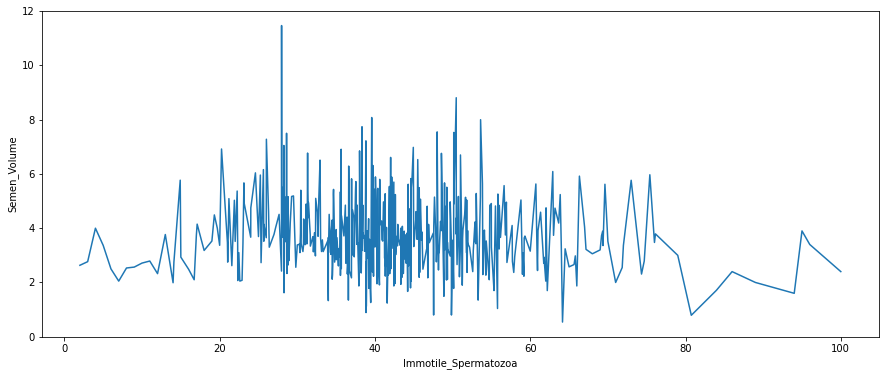

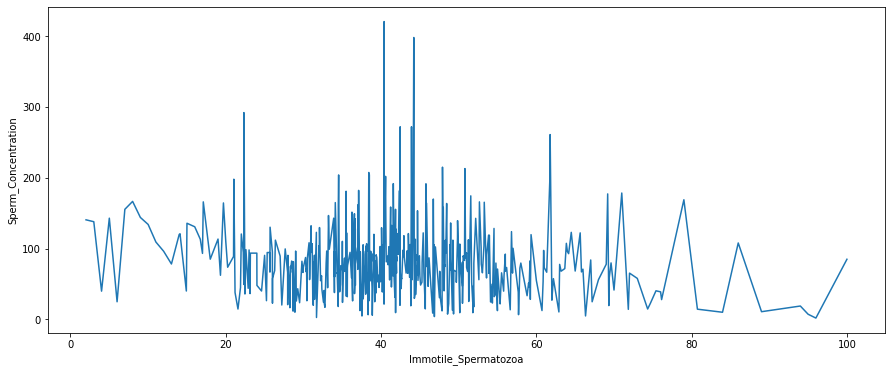

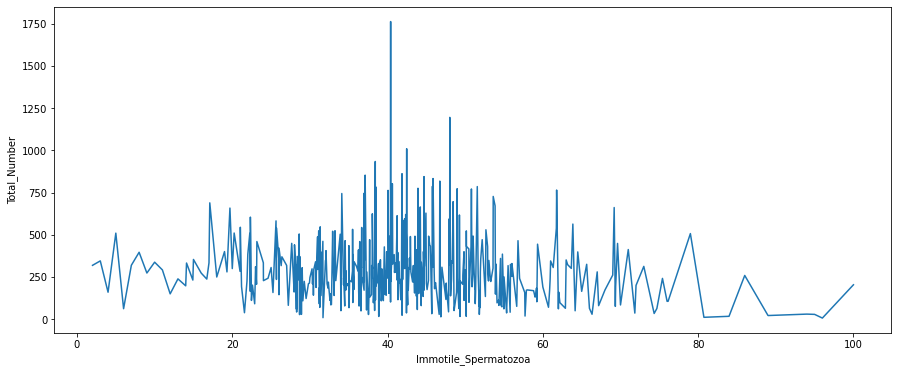

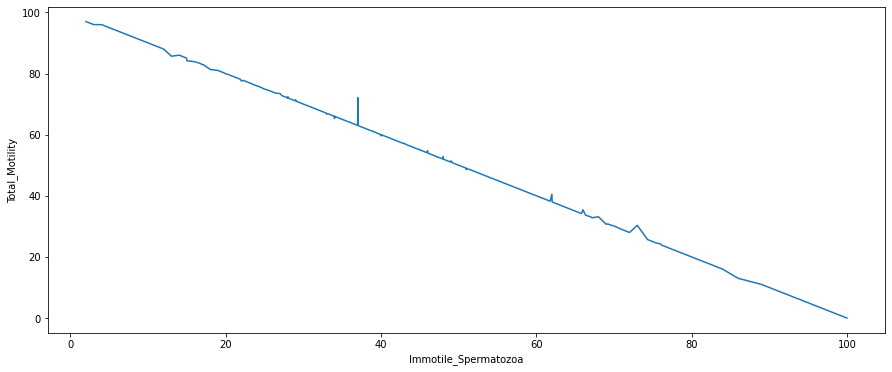

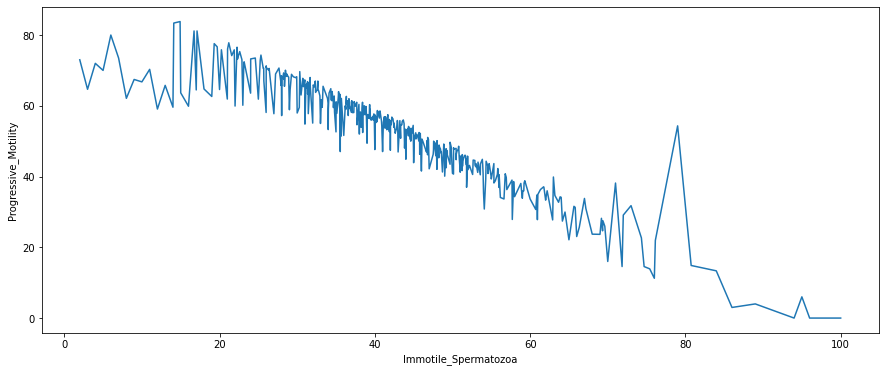

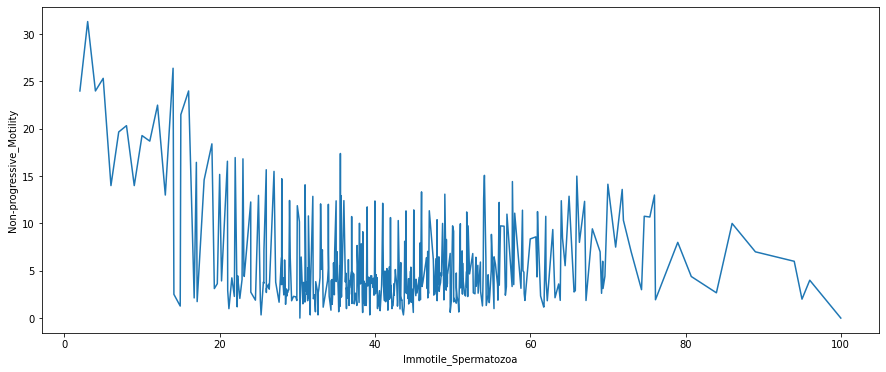

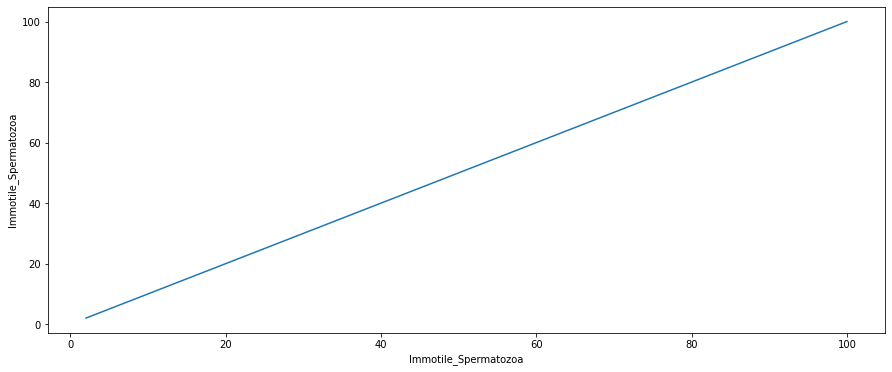

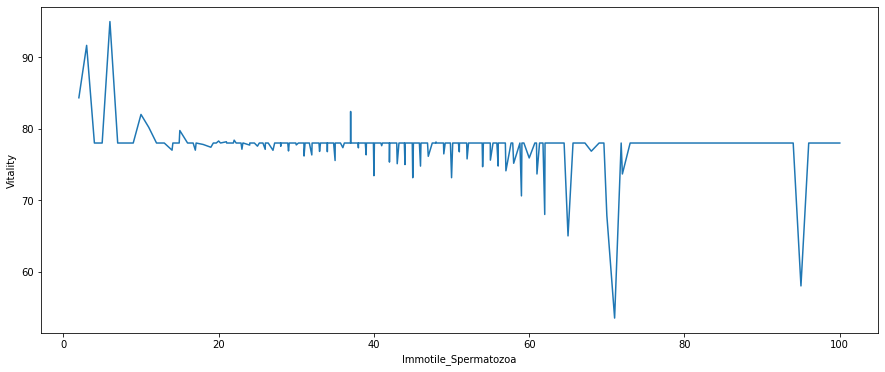

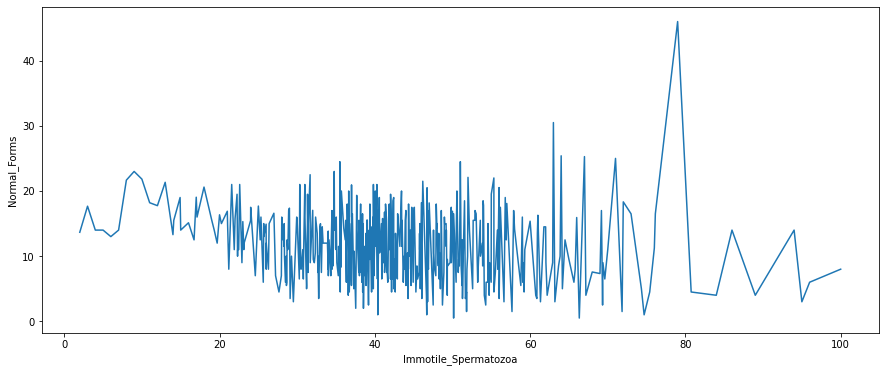

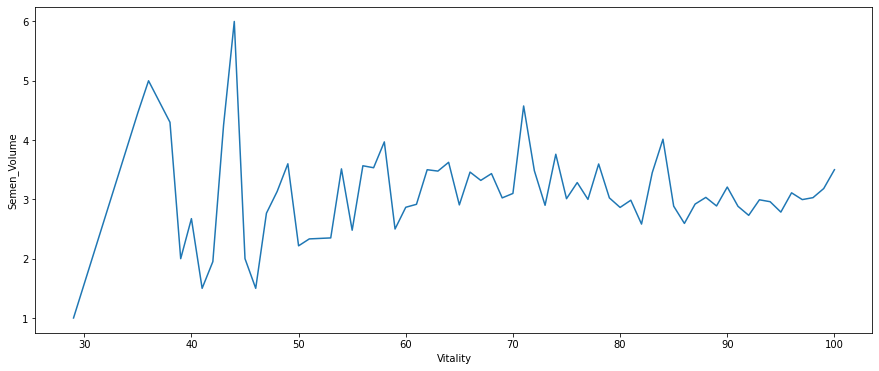

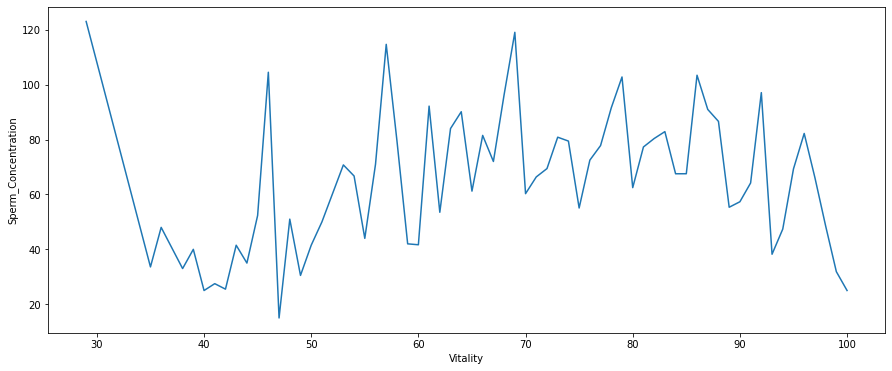

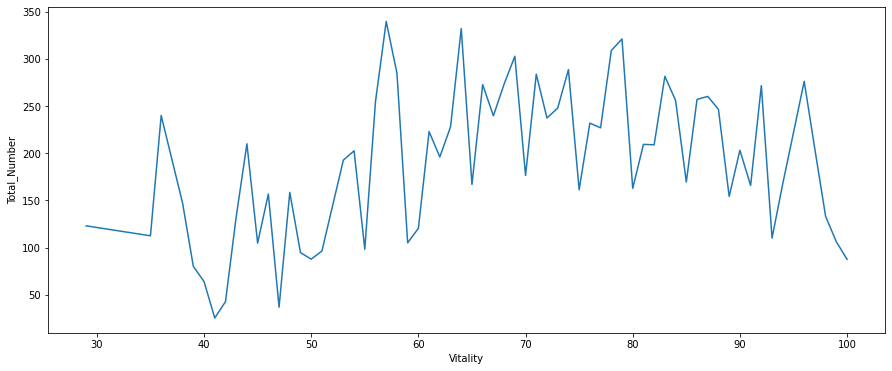

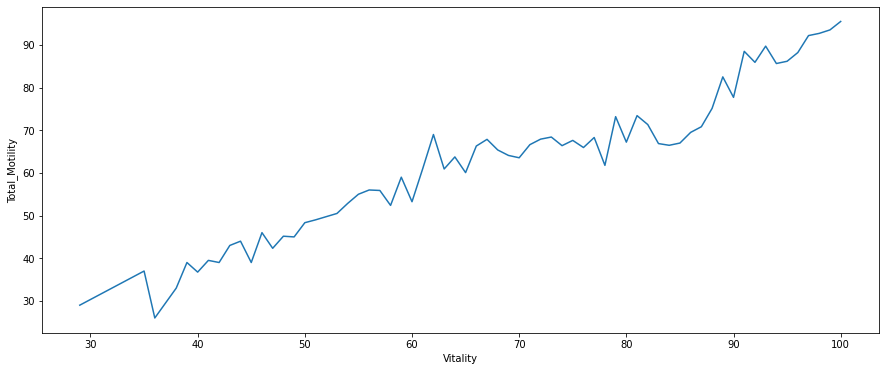

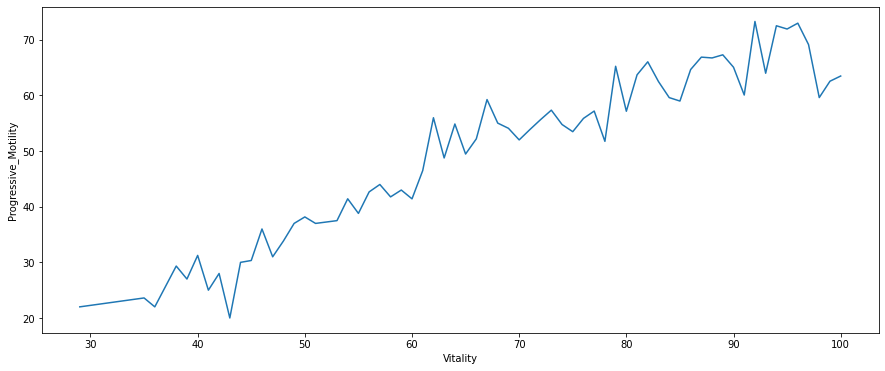

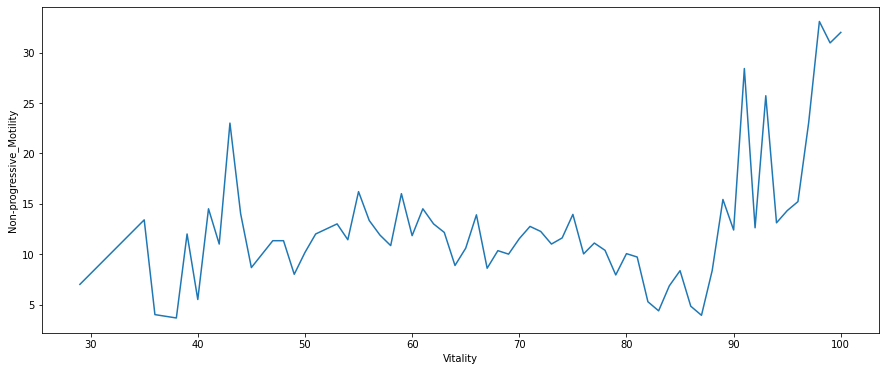

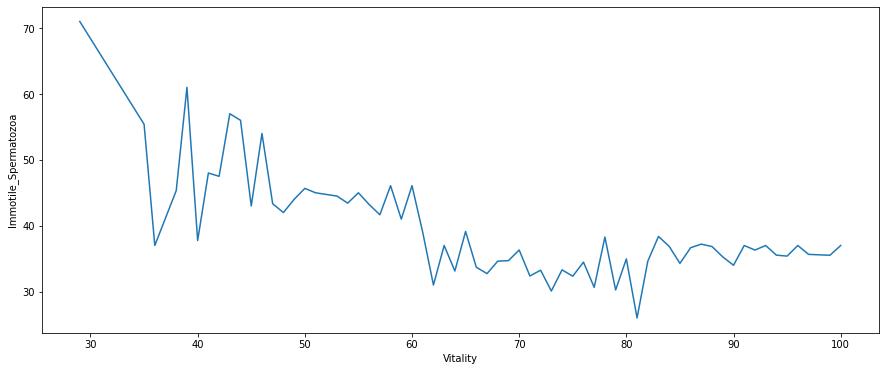

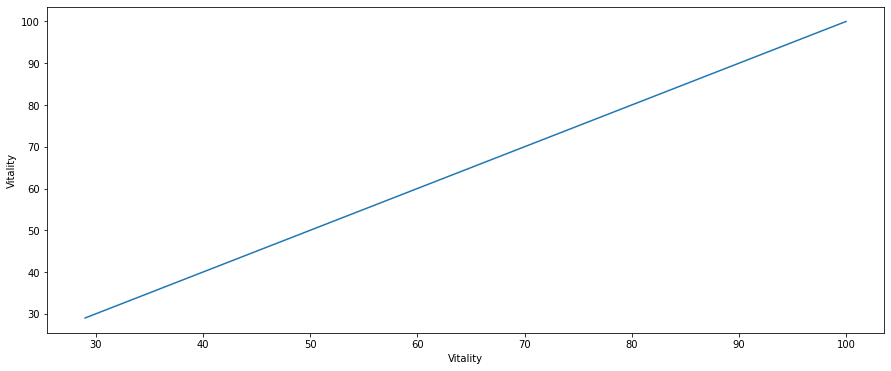

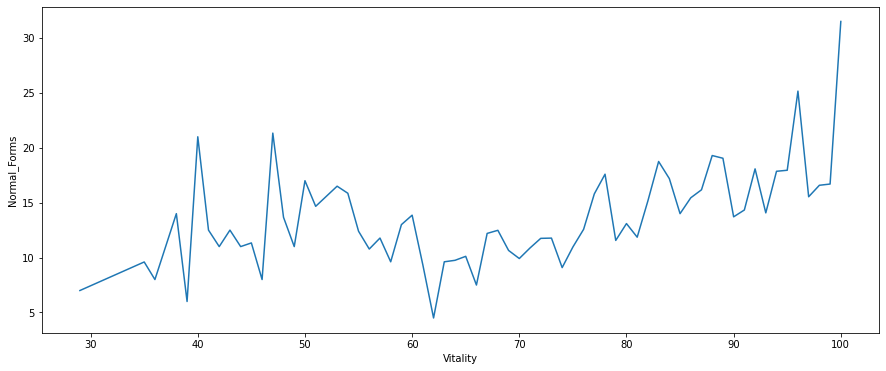

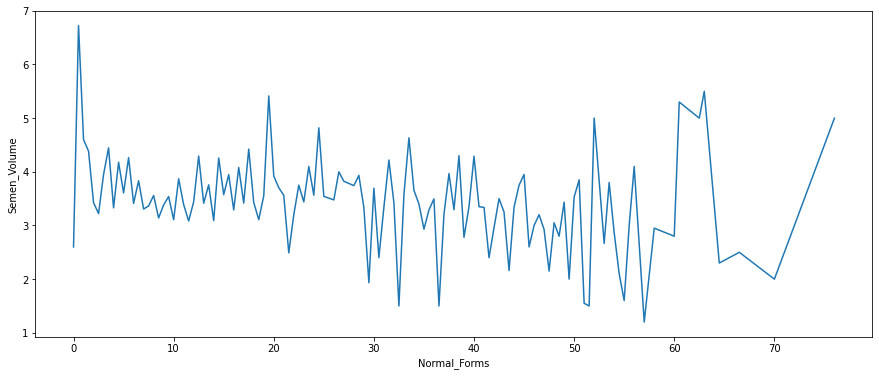

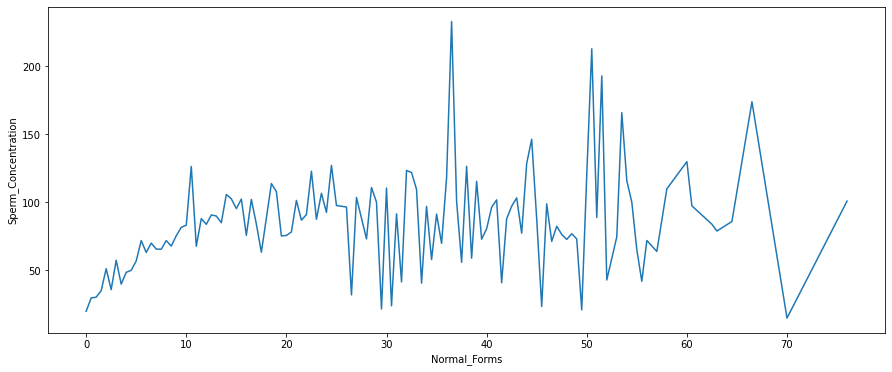

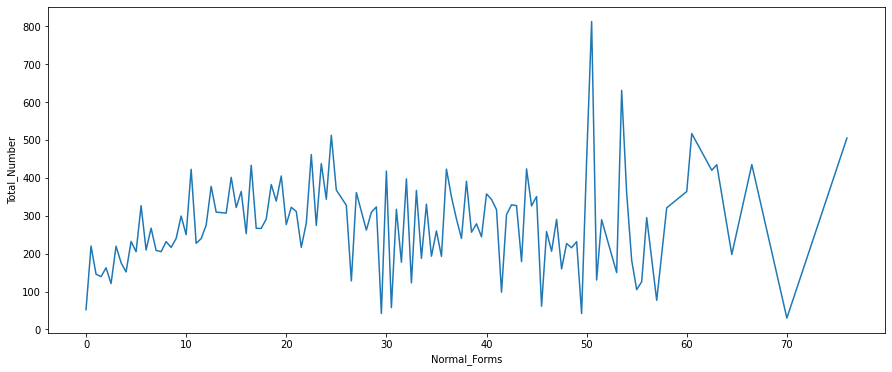

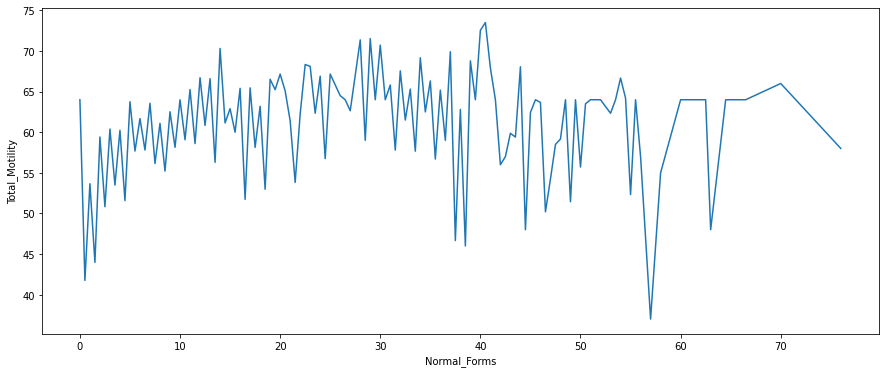

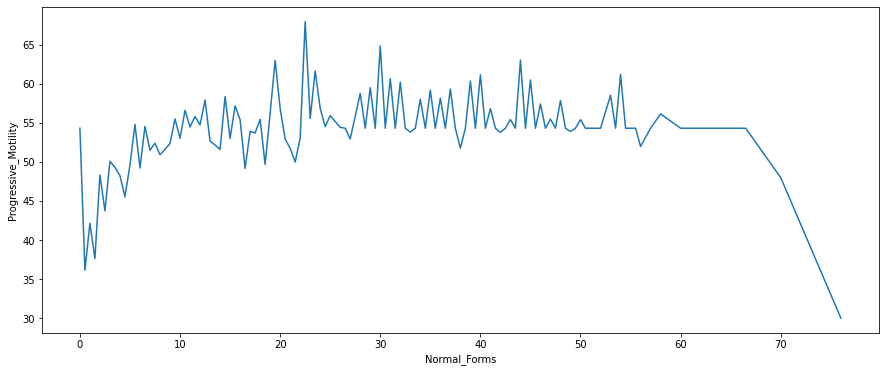

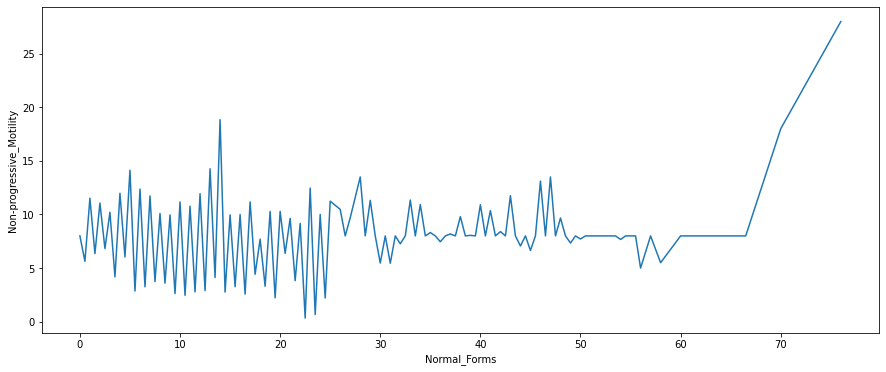

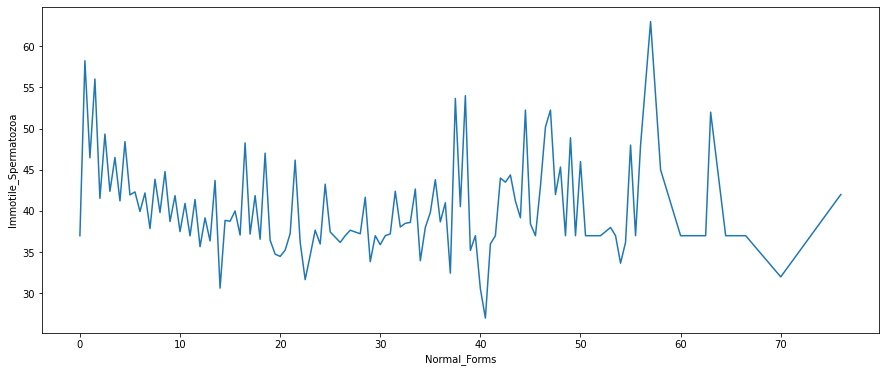

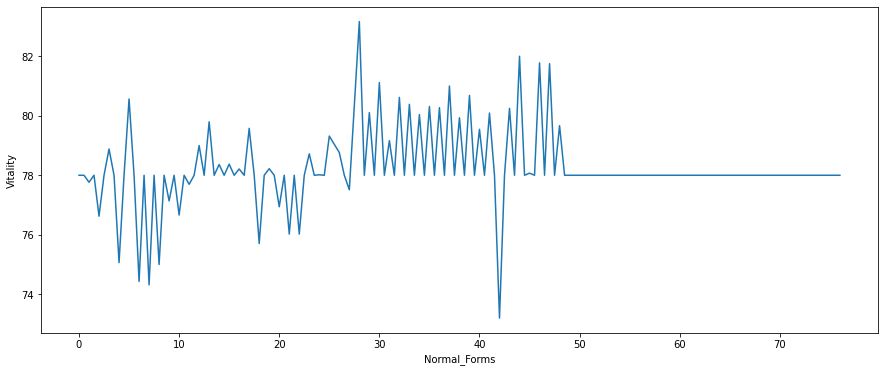

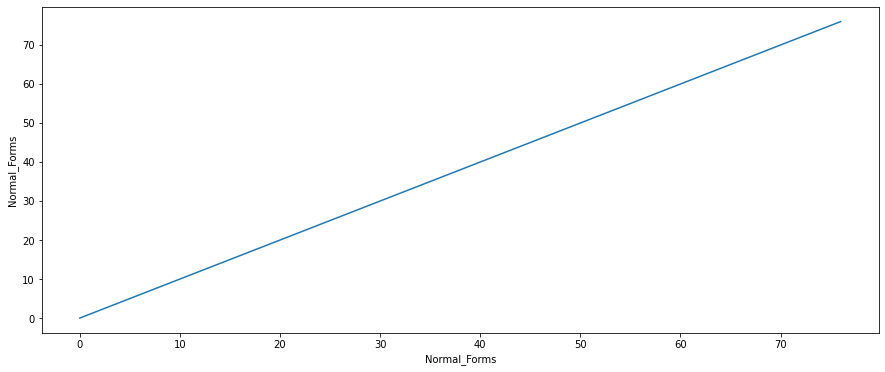

In [31]:
for j in df_new.columns:
    for i in df_new.columns:
        plt.figure(figsize=(15,6))
        sns.lineplot(x = df_new[j], y= df_new[i], ci = None, palette = "hls" )
        plt.show()

<Figure size 1080x432 with 0 Axes>

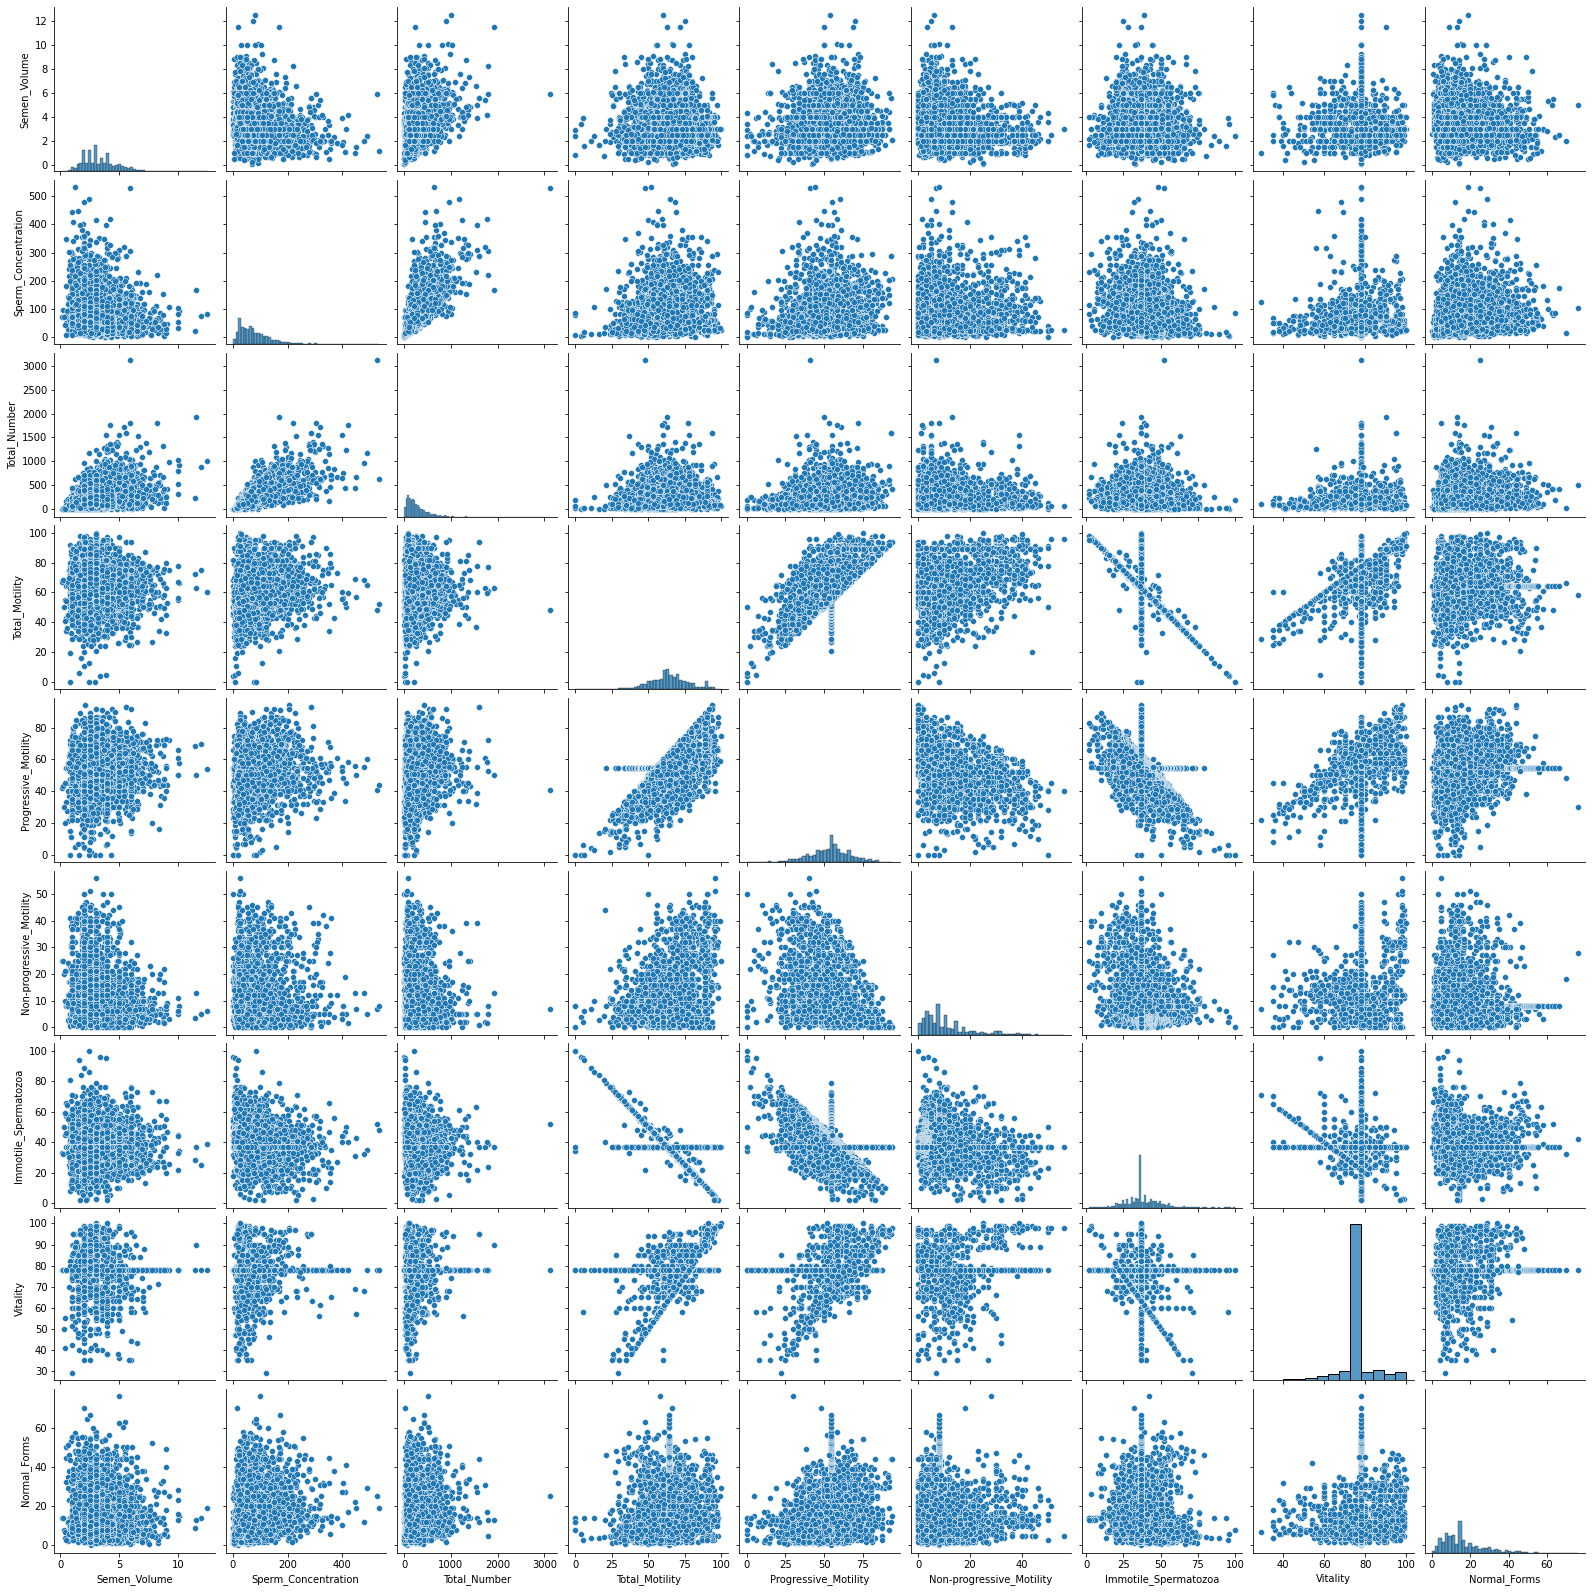

In [32]:
plt.figure(figsize=(15,6))
sns.pairplot(df_new)
plt.show()

In [33]:
# Correlation-
corrmat = df_new.corr()
corrmat

Semen_Volume  Sperm_Concentration  Total_Number  \
Semen_Volume                  1.000000            -0.134991      0.392928   
Sperm_Concentration          -0.134991             1.000000      0.762528   
Total_Number                  0.392928             0.762528      1.000000   
Total_Motility               -0.047543             0.052227      0.016890   
Progressive_Motility          0.079928             0.082295      0.118449   
Non-progressive_Motility     -0.181960            -0.024400     -0.133765   
Immotile_Spermatozoa         -0.003039            -0.111032     -0.076523   
Vitality                     -0.020154             0.004409      0.012283   
Normal_Forms                 -0.024901             0.172255      0.151813   

                          Total_Motility  Progressive_Motility  \
Semen_Volume                   -0.047543              0.079928   
Sperm_Concentration             0.052227              0.082295   
Total_Number                    0.016890              0.118449   
Total_Motility                  1.000000              0.731439   
Progressive_Motility            0.731439              1.000000   
Non-progressive_Motility        0.320357             -0.370898   
Immotile_Spermatozoa           -0.805693             -0.612633   
Vitality                        0.462978              0.377151   
Normal_Forms                    0.060334              0.173373   

                          Non-progressive_Motility  Immotile_Spermatozoa  \
Semen_Volume                             -0.181960             -0.003039   
Sperm_Concentration                      -0.024400             -0.111032   
Total_Number                             -0.133765             -0.076523   
Total_Motility                            0.320357             -0.805693   
Progressive_Motility                     -0.370898             -0.612633   
Non-progressive_Motility                  1.000000             -0.204023   
Immotile_Spermatozoa                     -0.204023              1.000000   
Vitality                                  0.134800             -0.112918   
Normal_Forms                             -0.091615             -0.034226   

                          Vitality  Normal_Forms  
Semen_Volume             -0.020154     -0.024901  
Sperm_Concentration       0.004409      0.172255  
Total_Number              0.012283      0.151813  
Total_Motility            0.462978      0.060334  
Progressive_Motility      0.377151      0.173373  
Non-progressive_Motility  0.134800     -0.091615  
Immotile_Spermatozoa     -0.112918     -0.034226  
Vitality                  1.000000      0.112236  
Normal_Forms              0.112236      1.000000

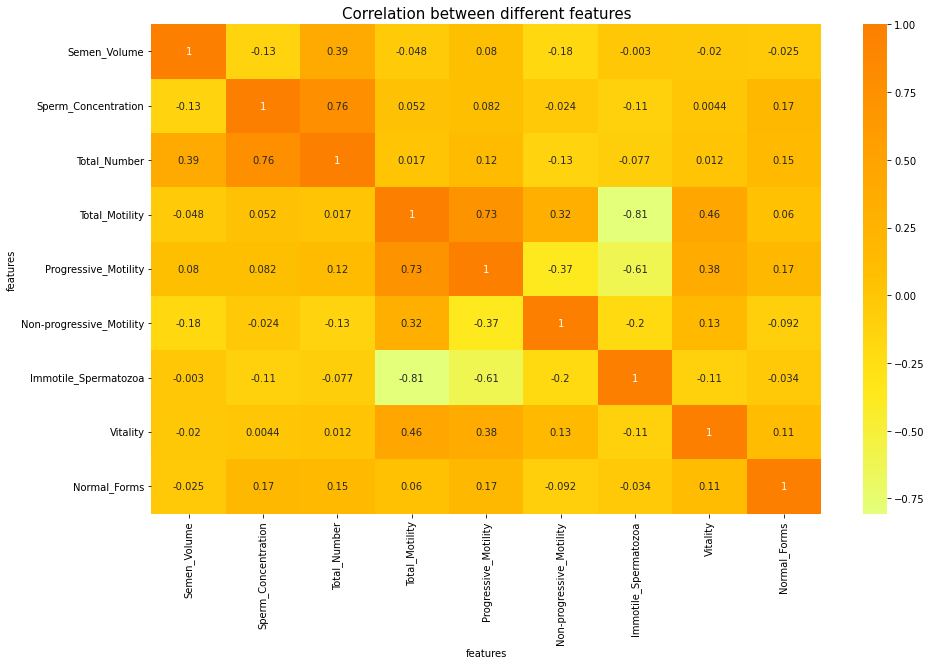

In [34]:
#Heatmap

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

##**The interquartile range (IQR)-**

* **The IQR describes the middle 50% of values when ordered from lowest to highest. To find the interquartile range (IQR), ​first find the median (middle value) of the lower and upper half of the data. These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.**

In [35]:
Q1= df_new.quantile(0.25)
Q3= df_new.quantile(0.75)
IQR = Q3-Q1
IQR

Semen_Volume                  1.910000
Sperm_Concentration          75.000000
Total_Number                258.136000
Total_Motility               17.000000
Progressive_Motility         17.000000
Non-progressive_Motility     10.601173
Immotile_Spermatozoa         11.000000
Vitality                      0.000000
Normal_Forms                 13.000000
dtype: float64

In [36]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [37]:
upper_bound

Semen_Volume                  7.07500
Sperm_Concentration         224.50000
Total_Number                757.20400
Total_Motility               98.50000
Progressive_Motility         87.50000
Non-progressive_Motility     30.90176
Immotile_Spermatozoa         59.50000
Vitality                     78.00000
Normal_Forms                 40.50000
dtype: float64

In [38]:
lower_bound

Semen_Volume                 -0.565000
Sperm_Concentration         -75.500000
Total_Number               -275.340000
Total_Motility               30.500000
Progressive_Motility         19.500000
Non-progressive_Motility    -11.502933
Immotile_Spermatozoa         15.500000
Vitality                     78.000000
Normal_Forms                -11.500000
dtype: float64

In [39]:
X = df_new.drop('Total_Motility', axis =1)
y = df_new['Total_Motility'] 

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.00169458 0.00270919 0.00171696 0.31885928 0.1245882  0.43573417
 0.11205614 0.00264148]


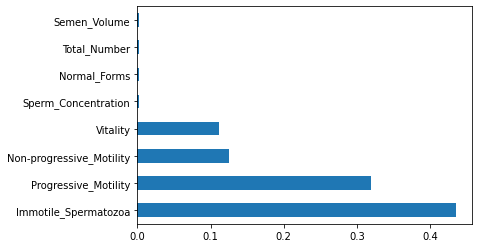

In [41]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [42]:
X.columns

Index(['Semen_Volume', 'Sperm_Concentration', 'Total_Number',
       'Progressive_Motility', 'Non-progressive_Motility',
       'Immotile_Spermatozoa', 'Vitality', 'Normal_Forms'],
      dtype='object')

In [43]:
top_8 = pd.DataFrame({'Feature Importance':feat_importances.nlargest(8)})
top_8

Feature Importance
Immotile_Spermatozoa                0.435734
Progressive_Motility                0.318859
Non-progressive_Motility            0.124588
Vitality                            0.112056
Sperm_Concentration                 0.002709
Normal_Forms                        0.002641
Total_Number                        0.001717
Semen_Volume                        0.001695

In [44]:
X = X[['Immotile_Spermatozoa','Progressive_Motility','Vitality','Non-progressive_Motility']]

In [45]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
scaler=MinMaxScaler()

In [46]:
X = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.25,
                                                     random_state=42)

In [48]:
#LinearRegression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = reg.predict(X_train)

In [50]:
y_pred_test = reg.predict(X_test)

In [51]:
mse = mean_squared_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)

print(f"Mean Squared Error:{mse}")
print(f"R-squared score:{r2}")

Mean Squared Error:9.178013684555342
R-squared score:0.9540179594110623


In [52]:
y_pred = reg.predict(X_test)

In [53]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


print(f"Mean Squared Error:{mse}")
print(f"R-squared score:{r2}")

Mean Squared Error:9.271120834239733
R-squared score:0.9468956687894828
